# Интернет магазин "Стримчик". Аналитическая справка.

Нам дан файл со следующими данными, где:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Нас предупредили: данные за 2016 год могут быть неполными.

Наша цель: 
1. Провести исследовательский анализ данных:
   1. Ответить на вопрос: сколько игр выпукалось в разные периоды?
   2. Составить продажи по различным платформам и  выбрать самые популярные из них для дальнейшего анализа.
   3. Ответить на вопрос о жизни платформ и выделить актуальный период для анализа.
   4. Найти несколько потенциально прибыльных платформ.
   5. Построить график "ящик с усами" по глобальным продажам игр в разбивке по платформам
   6. Ответить на вопрос: как влияют оценки критиков и игроков на продажи игр на данной платформе?
   7. Соотнести выводы с продажи игр на других платформах.
   8. Распределить игры по жанрам и рассказать о самых прибыльных жанрах и наоборот о самых неприбыльных жанрах
2. Составить портрет пользователя для каждого региона (NA, EU, JP).
   1. Найти топ-5 самых популярных платформ.
   2. Найти топ-5 самых поплурных жанров. Описать разницу.
   3. Оценить влияние рейтинга ESRB на продажи по регионам.
3. Проверить некоторые гипотезы:
   1. О том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   2. О том, что средние пользовательские рейтинги жанров Action и Sports разные. 
4. Сделать общий вывод

Как будем анализировать данные? (План действий):
1. Откроем файл и изучим его (первичный обзор).
2. Займёмся предобработкой данных
    - Заменим названия столбцов, если нужно.
    - Преобразуем столбцы в нужные типы (по необходимости).
    - Проверим строки на дубликаты (явные и неявные). Если надо - удалим или исправим их.
    - Обработаем пропуски при необходимости
    - Сосчитаем суммарные продажи во всех регионах
3. Проведём исследовательский обзор данных
   - Ответим на вопрос: сколько игр выпукалось в разные периоды?
   - Составим продажи по различным платформам и  выберем самые популярные из них для дальнейшего анализа.
   - Ответим на вопрос о жизни платформ и выделим актуальный период для анализа.
   - Найдём несколько потенциально прибыльных платформ.
   - Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.
   - Ответим на вопрос: как влияют оценки критиков и игроков на продажи игр на данной платформе?
   - Соотнесём выводы с продажи игр на других платформах.
   - Распределим игры по жанрам и расскажем о самых прибыльных жанрах и наоборот, о самых неприбыльных жанрах
4. Составим портрет пользователя для каждого региона (NA, EU, JP).
   - Выделим топ-5 самых популярных платформ.
   - Выделим топ-5 самых поплурных жанров. Опишем разницу.
   - Оценим влияние рейтинга ESRB на продажи по регионам.
5. Проверим некоторые гипотезы:
   - О том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - О том, что средние пользовательские рейтинги жанров Action и Sports разные. 
6. Сделаем общий вывод

In [1]:
# ячейка для импорта библиотек
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np

## Открываем файл и изучаем общую информацию о нём

In [2]:
# сохраняем данные в датафрейм
games = pd.read_csv(r'https://code.s3.yandex.net/datasets/games.csv')

# смотрим на датафрейм
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Первые наблюдения: 
1. Все названия записаны с больших букв - надо приводить к змеиному стилю все названия столбцов.
2. Столбец Year_of_Release (Год выхода игры) записан в виде чисел с плавающей точкой - по возможности привести к целому числу. 
3. Для платформ NES (Денди) и GB (GameBoy) нет оценок критиков, оценок пользователей и Рейтинга ESRB.

In [3]:
# выводим общую информацию о датафрейме
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Дополнительная информация полученная нами:
- Размер датафрейма - 16715 строк.
- Нет названия игры и её жанра в 2 случаях.
- Года игры нет в 269 случаях.
- Оценки критиков нет в чуть менее, чем в 8600 случаев.
- Оценки пользователей нет в 6101 случае и внимание он имеет тип строки. Не порядок, надо исправлять.
- Рейтинга нет в чуть более, чем в 6750 случаях

## Предобработка данных

### Заменяем названия столбцов

In [4]:
# приводим названия к "змеиному" стилю
games.columns = games.columns.str.lower()

# проверяем успешность замены
games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


3 момента: 
- названия столбцов успешно преобразовались
- игры в конце датафрейма очень не популярные - у них очень маленькие продажи
- в столбце user_score есть значение "tbd" - надо разбираться что это такое.

### Заполняем пропуски в значениях столбцов

In [5]:
# выводим уникальные значения столбца года выпуска
games.year_of_release.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Тут нужно посмотреть в каких местах были эти пропуски. И посмотреть можно ли их заполнить. Предпожительно пропуски в столбце year_of_release (год выпуска) могли возникнуть из-за технической ошибки (сбоя) или же люди, что составляли данные просто не знали (не следили) за выпуском игр, а искать в интернете посчитали слишком долгим.

In [6]:
# где именно пропущен год выпуска?
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущены год выпуска игр на разных платформах - одинаковым значением не заполнишь. Есть несколько различных решения приходящих на ум:
1. Более точное, но долгое - пробить отдельно каждую из 269 игр по названию в интернете на год выхода. Скорее всего так можно заполнить часть пропущенных значений.
2. Относительно более быстрое, но вот точность может пострадать. Разделить игры по платформам и рассчитать срелний год выпуска для каждой из этих платформ и заполнить им. (Поскольку выбросов здесь нет - заполнять медианой смысла большого нет)
3. Замена на значение - заглушку (np.nan или "неизвестный", например)
4. Удаление этих строк (при небольшом количестве таких строк - если их не жалко)
Поступать будем 2ым способом - первый слишком долгий и если бы значений было ещё больше - то уже и невозможный. С 3 способом не хочется переводить  целые числа в вещественные или тем более в строки. 4 способ без необходимости применять не хочу - могут оказаться ценные значения в других столбцах.

In [7]:
# рассчитаем средний год выпуска по каждой из платформ
mean_year_of_release_on_platform = games.groupby('platform').year_of_release.mean().round()

# что у нас получилось?
mean_year_of_release_on_platform

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1996.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1987.0
NG      1994.0
PC      2009.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2014.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

Вот и года для заполнения. Пора заполнять.

In [8]:
# заполняем пропуски в столбце year_of_release этими занчениями
for platform in mean_year_of_release_on_platform.index:
    games.loc[games.platform == platform, 'year_of_release'] = games.query('platform == @platform').year_of_release\
    .fillna(mean_year_of_release_on_platform[platform])
    
# приводим столбец year_of_release к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('int64')

# выводим статиску для проверки заполнения пропусков
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Пропуски в столбце year_of_release заполнены. Далее проверим пропуски в жанре и названии игры, может удасться понять, что именно пропущено (благо тут всего по 2 пропуска). Пропуски могли возникнуть из-за полного отстутвия данных об этих играх или же вследствие технической ошибки.

In [9]:
# где пропуски в жанре или названии игры?
games.query('name.isna() | genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Значит, причина в том, что не было данных об этих играх вообще. Такое не заполняется. Мы ничего не знаем про эти игры, кроме их продаж. Даже год и тот заполнился только из-за других игр на этой платформе. Далее - пропуски в оценке критиков. Сами пропуски могли возникнуть из-за потери данных, но скорее всего возникли из-за очень редкой, не сохранившейся по сей день платформе.

In [10]:
# где пропуски в оценке критиков?
games.query('critic_score.isna()').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Похоже, что очень часто, где нет оценки критиков нет также оценки оценки пользователей, а также рейтинга игры по возрасту. В этом случае из этих данных будет не восстаносить пропущенные значения ни в оценке критиков, ни в оценке игроков. Надо смотреть на те строки, где это не так.

In [11]:
# где у нас есть оценка пользователей и нет оценки критиков?
games.query('~user_score.isna() & critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,tbd,M
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


В этом случае достаточно часто фигурирет значение 'tbd' в столбце user_score. А сама эта абревиатура значит - "будут определено позже" - сейчас это лучше заменить на nan. А там где есть оценка пользователей - сделаем проще - умножим оценку пользаватлей на 10 и это будет оценкой критиков (это из-за разности шкал - у пользователей 10 бальная, у критиков 100 бальная)

In [12]:
# меняем tbd в столбце user_score на NaN
games.user_score.replace('tbd', np.nan, inplace=True)

# что получилось?
print(games.user_score.sort_values().unique())
games.critic_score.sort_values().unique()

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]


array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [13]:
# приводим столбец user_score к вещественному типу
games['user_score'] = games.user_score.astype('float32')

# заполняем, где можно, столбец critic_score
new_crit_score = games.query('~user_score.isna() & critic_score.isna()').user_score * 10
for idx in new_crit_score.index:
    games.loc[games.index == idx, 'critic_score'] = new_crit_score[idx]

# сколько заполнилось значений?
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8710 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Насколько можно мы заполнили столбец critic_score. По аналогии заполним где возможно user_score. Потери в оценках пользователей могли возникнуть из-за редкости игр и те немногие пользователи (игроки) не захотели оставлять свой отзыв об этой игре. Есть, впрочем и другое предположение: там была эпоха приставок и вообще не было места, где оставлять свои оценки для игры.

In [14]:
# заполняем где возможно user_score
new_user_score = games.query('user_score.isna() & ~critic_score.isna()').critic_score / 10
for idx in new_user_score.index:
    games.loc[games.index == idx, 'user_score'] = new_user_score[idx]
    
# итого вышло заполнить
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8710 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Насчёт столбца рейтинг (от организации ESRB), то его мы заполнить не сможем. Пропуски в этом столбце могли возникнуть из-за следующих причин:
- игры вышедшие до образования этой организации.
- слишком редкие игры - разработчики не приглашали эту организацию к оценке своей игры.
- мог быть и технический сбой (потеря данных).

В любом случае нам эти данные взять неоткуда. А вот посмотреть, какие там есть реальные рейтинги можно и нужно.

In [15]:
# смотрим на рейтинги от организации ESRB
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вот что означают данные рейтинги:
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Итак, у нас есть один случай неявного дубликата. Нужно удалять.

In [16]:
# Удаляем скрытый дубликат из столбца rating
games.rating.replace('K-A', 'E', inplace=True)

### Проверка на явные и неявные дубликаты

In [17]:
# смотрим на явные дубликаты
games.duplicated().sum()

0

Явных дубликатов нет. На невные дубликаты можно проверить столбец с жанром - мало ли что бывает.

In [18]:
# выводим уникальные названия жанров
games.genre.sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [19]:
# выводим уникальные значения столбца platform
games.platform.sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Неявных дубликатов тоже нет. Двигаемся дальше.

### Создаём столбец с суммарными продажами во всех регионах

In [20]:
# Добавляем столбец с суммарными продажами по регионам
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

# проверяем успешность добавления столбца
games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Изменяем типы данных и делаем вывод о предобработке данных

In [21]:
# меняем типы для сокращения потребления памяти
games['na_sales'] = games['na_sales'].astype('float32')
games['eu_sales'] = games['eu_sales'].astype('float32')
games['jp_sales'] = games['jp_sales'].astype('float32')
games['other_sales'] = games['other_sales'].astype('float32')
games['total_sales'] = games['total_sales'].astype('float32')
games['critic_score'] = games['critic_score'].astype('float32')

# результат предобработки
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8710 non-null   float32
 9   user_score       8710 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float32
dtypes: float32(6), float64(1), int64(1), object(4)
memory usage: 1.1+ MB


По результатам предобработки заполнили года выхода игр, насколько смогли заполнили пользовательские оценки и оценки критиков, посчитали суммарные продажи по играм во всём мире. Сократили на 0.3 MB память использованную -  для небольшого датафрейма не мало.

## Проводим исследовательский анализ данных

### Проводим анализ выхода игр по годам

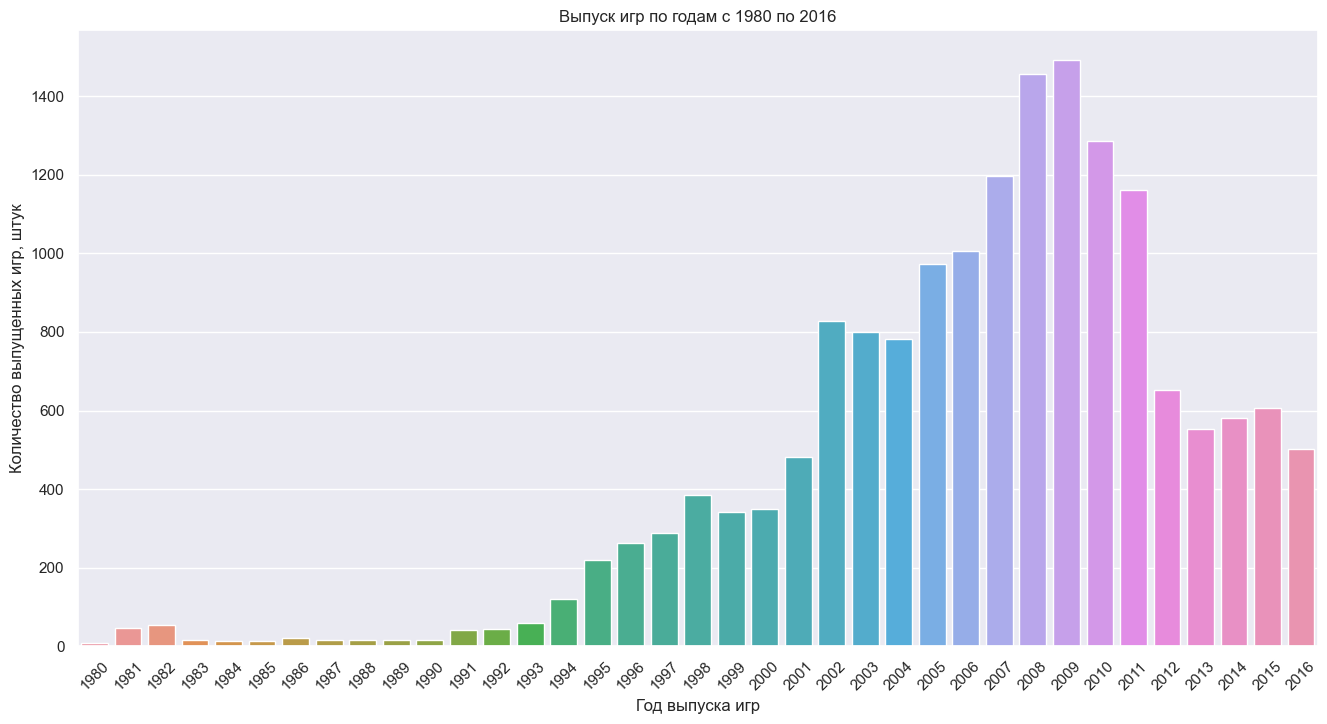

In [22]:
# сколько игр выпускались в разные годы?
games_on_year = games.groupby('year_of_release', as_index=False).agg({'genre': 'count'})

# строим график
sns.set(rc={'figure.figsize': (16, 8)})
ax = sns.barplot(x=games_on_year.year_of_release, y=games_on_year.genre)
ax.set(title='Выпуск игр по годам с 1980 по 2016', xlabel='Год выпуска игр', ylabel='Количество выпущенных игр, штук')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);

Картина скаладывается следующая: до 1994 года игр особо много не было (не более 50 штук за год) - время всевозможных приставок. С 1994 года по 2009 - уверенный рост количества игр (от 100 до 1400+ за год). С 2010 года наблюдается падение количества выпущенных игр. Для анализа современных тенденция рассматривать игры старше 2002 года бессысленно. Для анализа новейших тенденций достаточно рассмотреть данные с 2010 года. Сейчас в среднем выпускается 500 - 600 игр за год.

### Рассматриваем продажи игр по различным платформам

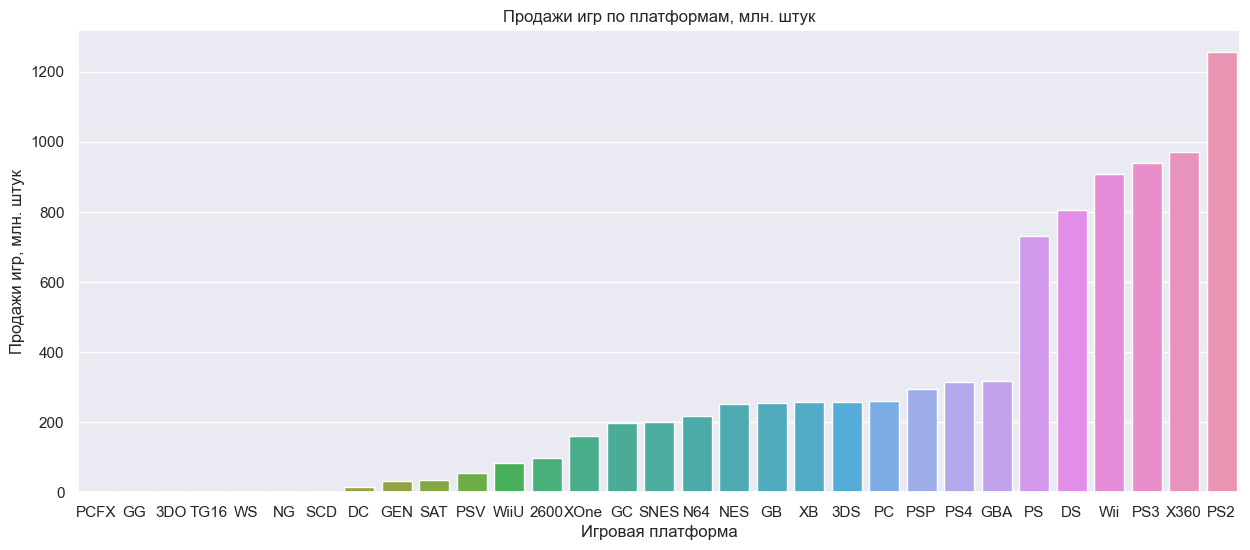

In [23]:
# вычисляем суммарные продажи по платформам
platform_sales = games.groupby('platform', as_index=False).agg({'total_sales': 'sum', 'year_of_release': ['min', 'max']})

# избавляемся от мультииндекса в названиях столбцов
platform_sales.columns = ['platform', 'total_sales', 'min_year_of_release', 'max_year_of_release']

# сортируем наши данные по продажам
platform_sales = platform_sales.sort_values(by='total_sales')
 
# находим срок актиных продаж
platform_sales['active_sales_period'] = platform_sales.max_year_of_release - platform_sales.min_year_of_release

# визуализируем продажи по платформам
sns.set(rc={'figure.figsize': (15, 6)})
ax = sns.barplot(x=platform_sales.platform, y=platform_sales.total_sales)
ax.set(title='Продажи игр по платформам, млн. штук', xlabel='Игровая платформа', ylabel='Продажи игр, млн. штук');

Итак: самые популярные игровые платформы это PS2 (Play Station 2) - продажи более 1200 млн. игр, далее  идут X360, PS3, Wii, DS и PS - у них от 720 млн. игр до 980 млн. игр. На всех остальных игровых платформах продано не более 300 млн. игр. Есть и совсем редкие платформы - ими стали PCFX, GG, 3DO, TG16, WS, NG и SCD - даже если они всё ещё продаются (в чём я сомневаюсь), то брать игры под них уж точно не стоит - пользоваться спросом не будут.

Средняя продолжительность продаж игр для всех платформ равна 7.612903225806452
Медианная продолжительность продаж игр для всех платформ равна 6.0


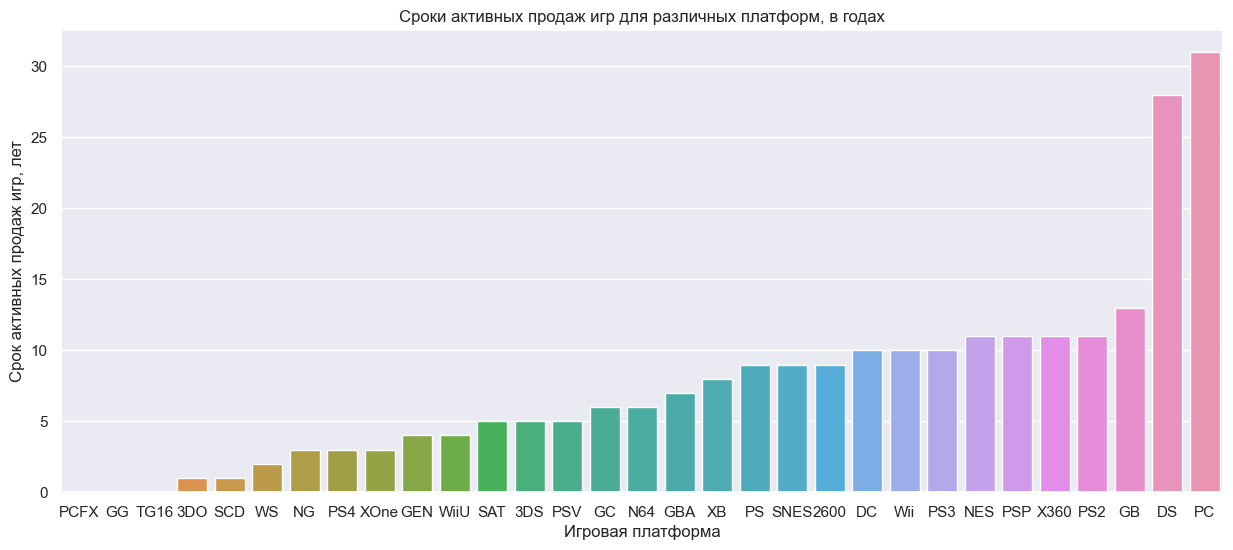

In [24]:
# сортируем для наглядности по сроку активных продаж
platform_sales = platform_sales.sort_values(by='active_sales_period')

# визуализируем сроки жизни различных платформ
ax = sns.barplot(x=platform_sales.platform, y=platform_sales.active_sales_period)
ax.set(title='Сроки активных продаж игр для различных платформ, в годах', \
       xlabel='Игровая платформа', ylabel='Срок активных продаж игр, лет')

print(f'Средняя продолжительность продаж игр для всех платформ равна {platform_sales.active_sales_period.mean()}')
print(f'Медианная продолжительность продаж игр для всех платформ равна {platform_sales.active_sales_period.median()}')

Мы узнали следующее: средний срок продажи игр на 1 платформе немногим более 7.5 лет, а медианная продолжительность жизни - 6 лет. Разница достагается за счёт "долгоиграющих" платформ - PC и DS. Их срок жизни более 25 лет. Отсюда следует вывод - глубина анализа больше 8 лет смысла не имеет.

Теперь пора вернуться к самым популярным платформам и постоить продажи игр для них по годам. Напоминаем: самые популярые платформы - это PS2, X360, PS3, Wii, DS и PS.

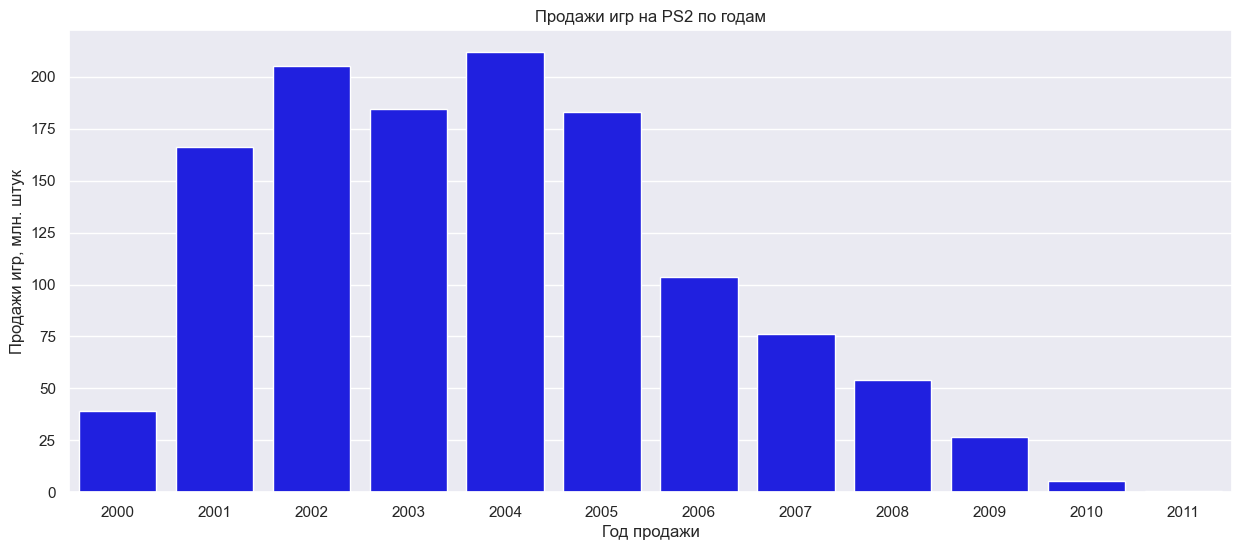

In [25]:
# группируем данные и по платформе и по годам - может и срок жизни платформ узнаем.
platform_sales_by_year = games.groupby(['platform', 'year_of_release'], as_index=False).\
aggregate({'total_sales': 'sum'})

# создаём датафреймы с выбранными платформами
ps2_sales_by_year = platform_sales_by_year.query("platform == 'PS2'")
x360_sales_by_year = platform_sales_by_year.query("platform == 'X360'")
ps3_sales_by_year = platform_sales_by_year.query("platform == 'PS3'")
wii_sales_by_year = platform_sales_by_year.query("platform == 'Wii'")
ds_sales_by_year = platform_sales_by_year.query("platform == 'DS'")
ps_sales_by_year = platform_sales_by_year.query("platform == 'PS'")

# визуализируем продажи по годам PS2
ax = sns.barplot(x=ps2_sales_by_year.year_of_release, y=ps2_sales_by_year.total_sales, color='blue')
ax.set(title='Продажи игр на PS2 по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности Play Station 2 пришёлся на период с 2001 по 2005 года. на пике популярности продажи составляли от 170 до 210 млн. штук. А далее началось затухание продаж. В 2011 году продажи были уже очень низкие.

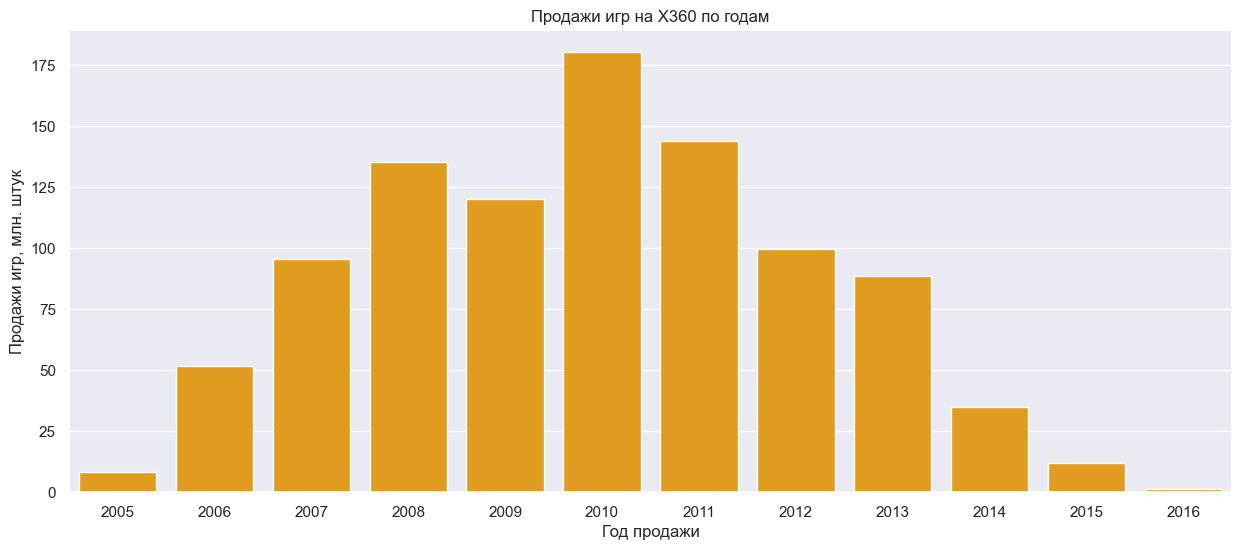

In [26]:
# визуализируем продажи по годам X360
ax = sns.barplot(x=x360_sales_by_year.year_of_release, y=x360_sales_by_year.total_sales, color='orange')
ax.set(title='Продажи игр на X360 по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности X360 пришёлся на период с 2008 по 2011 года. На пике популярности продажи составляли от 120 до 180 млн. штук. А далее началось затухание продаж. В 2016 году продажи были уже очень низкие.

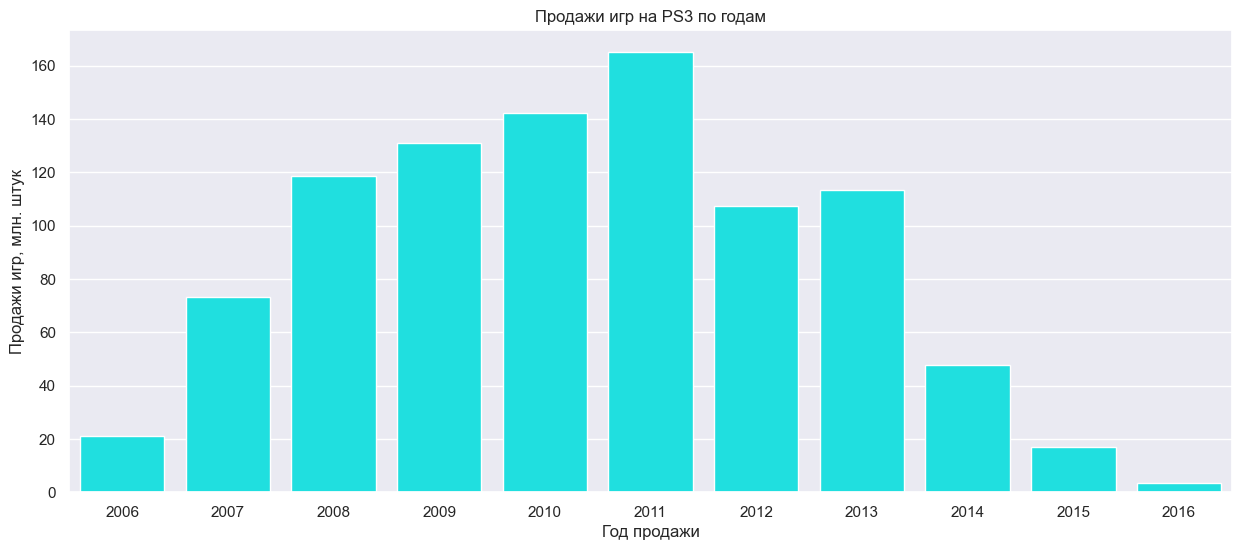

In [27]:
# визуализируем продажи по годам PS3
ax = sns.barplot(x=ps3_sales_by_year.year_of_release, y=ps3_sales_by_year.total_sales, color='cyan')
ax.set(title='Продажи игр на PS3 по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности Play Station 3 пришёлся на период с 2008 по 2013 года. На пике популярности продажи составляли от 110 до 165 млн. штук. А далее началось затухание продаж. В 2016 году продажи уже небольшие.

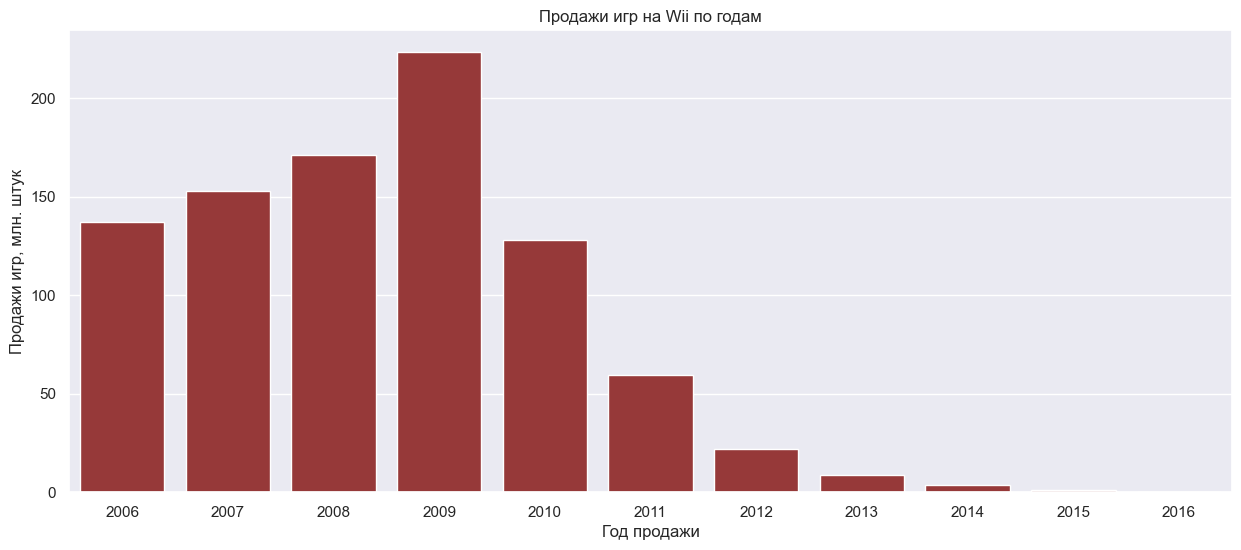

In [28]:
# визуализируем продажи по годам Wii
ax = sns.barplot(x=wii_sales_by_year.year_of_release, y=wii_sales_by_year.total_sales, color='brown')
ax.set(title='Продажи игр на Wii по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности Wii пришёлся на период с 2006 по 2010 года. На пике популярности продажи составляли от 130 до 220 млн. штук. А далее началось затухание продаж. В 2015 - 2016 году продажи уже относительно маленькие.

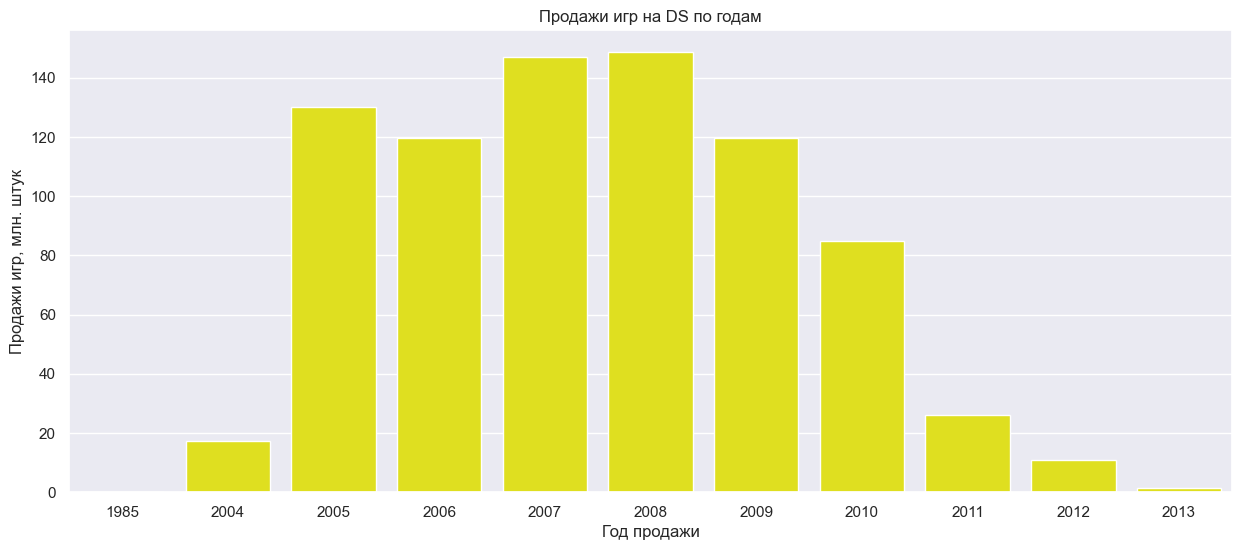

In [29]:
# визуализируем продажи по годам DS
ax = sns.barplot(x=ds_sales_by_year.year_of_release, y=ds_sales_by_year.total_sales, color='yellow')
ax.set(title='Продажи игр на DS по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности DS пришёлся на период с 2005 по 2010 год. На пике популярности продажи составляли от 85 до 145 млн. штук. А далее началось затухание продаж. В 2013 году продажи уже маленькие.

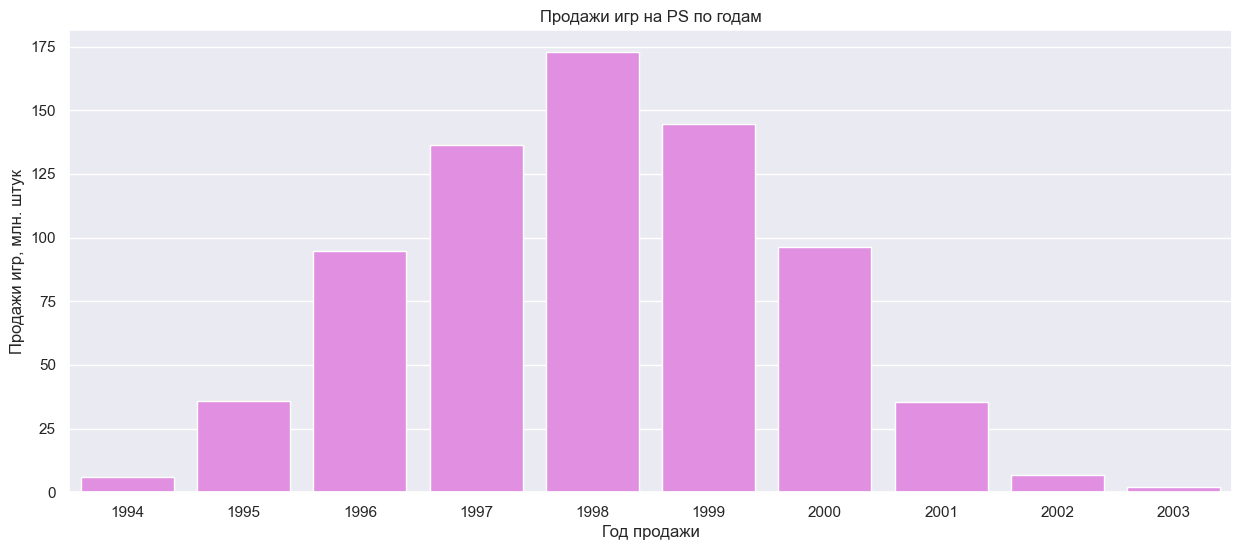

In [30]:
# визуализируем продажи по годам PS
ax = sns.barplot(x=ps_sales_by_year.year_of_release, y=ps_sales_by_year.total_sales, color='violet')
ax.set(title='Продажи игр на PS по годам', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Пик популярности PS пришёлся на период с 1996 по 2000 год. На пике популярности продажи составляли от 95 до 170 млн. штук. А далее началось затухание продаж. В 2003 году продажи уже маленькие.

По всему итогу имеем следующее: срок больших продаж игр на всех этих платформах идёт 5 - 7 лет, остальные продажи уже не такие крупные. Но брать этот срок больших продаж в качестве актульного периода нельзя - мы гарантированно захватываем даже отжившие платформы, не пригодные для текущих продаж (например: PS2). Но мы также знаем, что данные за 2016 год неполные и насколько они неполные нам неизвестно. Поэтому сравнивать 2015 и 2016 год (и только их) может быть не совсем корректно - надо добавить ещё 1 год - 2014 для полноты картины. Итак: берём за актульный период срок в 3 года.

### Анализ современных платформ

In [31]:
# Берём данные по продажам игр за последние 3 года (актуальные данные)
modern_games = games.query('year_of_release > 2013')

# какие платформы сейчас используются?
modern_platforms = set(modern_games.platform.unique())
print(*modern_platforms)

PS3 Wii PS4 X360 PSP PSV 3DS XOne WiiU PC


Из более раннего анализа мы знаем, что анализировать сейчас платформы PS2, PS3, Wii, X360 и DS в настоящее время смысла не имеет - они либо уже не продаются, либо их продажи находятся на очень сильном спаде. Сосредоточить внимание надо на других платформах.

In [32]:
# исключаем из анализа названные выше платформы
outdated_platforms = {'PS3', 'Wii', 'X360'}
modern_platforms -= outdated_platforms

# итак, остались следующие платформы
modern_platforms

{'3DS', 'PC', 'PS4', 'PSP', 'PSV', 'WiiU', 'XOne'}

Теперь по этим платформам постоим столбчатые диаграммы для того, чтобы понять как движуться эти платформы - растут, падают или же находятся около своего пика.

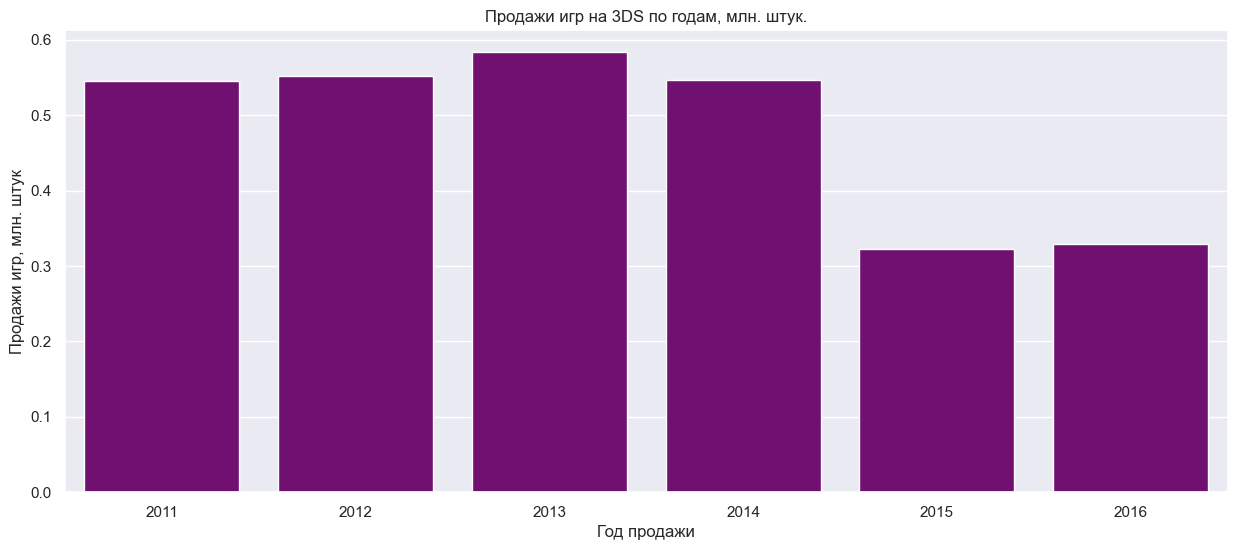

In [33]:
# отбираем данные для этих платформ
platform_3ds = games.query("platform == '3DS'")
platform_pc = games.query("platform == 'PC'")
platform_ps4 = games.query("platform == 'PS4'")
platform_psp = games.query("platform == 'PSP'")
platform_psv = games.query("platform == 'PSV'")
platform_wiiu = games.query("platform == 'WiiU'")
platform_xone = games.query("platform == 'XOne'")

# визуализируем данные для платформы 3DS
ax = sns.barplot(x=platform_3ds.year_of_release, y=platform_3ds.total_sales, color='purple', errorbar=None)
ax.set(title='Продажи игр на 3DS по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Перед нами относительно небольшая платформа (3DS)- на пике 550 тысяч штук проданных игр. По состаянию на сегодняшний день - некоторый спад - примерно 300 тысяч штук проданных игр.

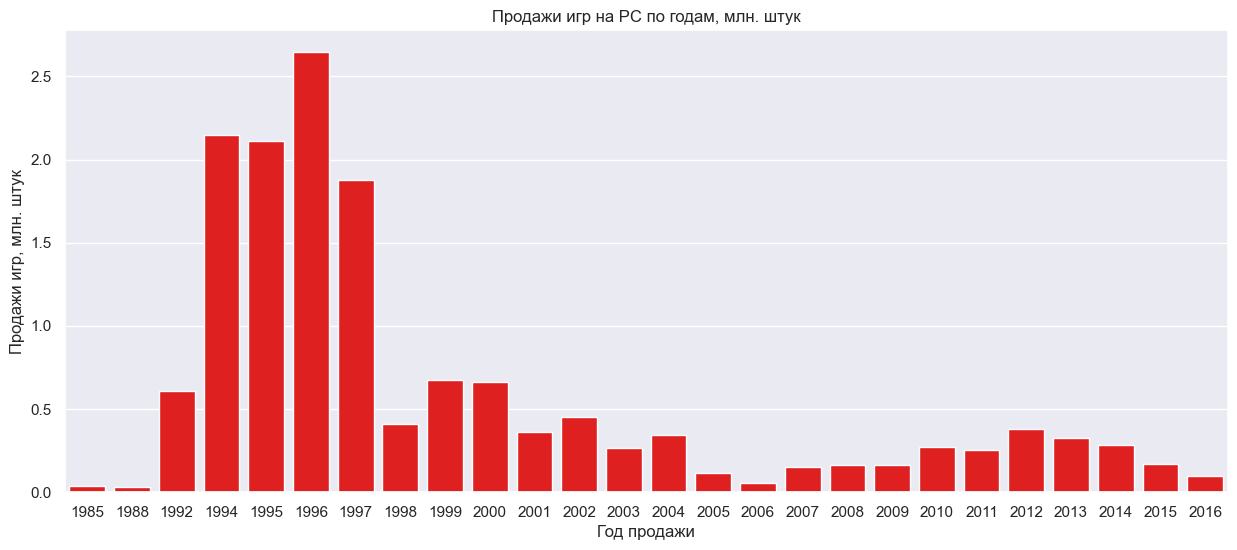

In [34]:
# визуализируем данные для платформы PC
ax = sns.barplot(x=platform_pc.year_of_release, y=platform_pc.total_sales, color='red', errorbar=None)
ax.set(title='Продажи игр на PC по годам, млн. штук', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Спрос на игры на PC (компьютере) есть - он постоянный и не очень большой в наше время. Примерно 100 - 200 тыс. штук в год. Пик пришёлся на 1994 - 1997 года. Тогда продавали от 1.9 до 2.6 млн. штук игр в год. Можно учесть в качестве нишевого продукта.

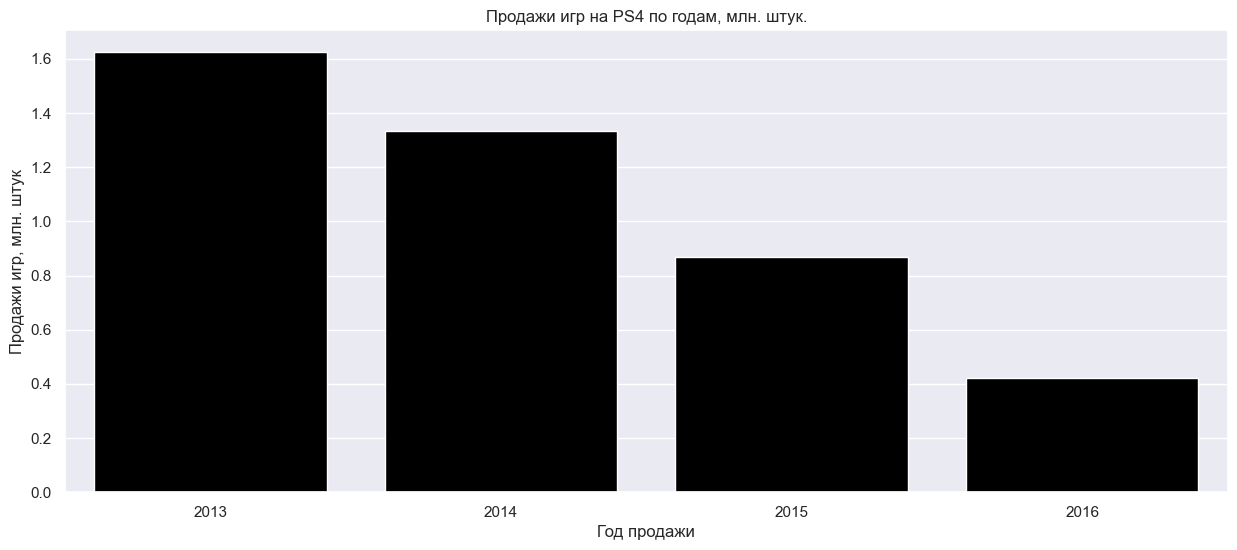

In [35]:
# визуализируем данные для платформы PS4
ax = sns.barplot(x=platform_ps4.year_of_release, y=platform_ps4.total_sales, color='black', errorbar=None)
ax.set(title='Продажи игр на PS4 по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Игры на Play Station 4 переживают спад в наше время - сегодняшний спрос - 400 тыс. штук. И дальше больше точно не будет.

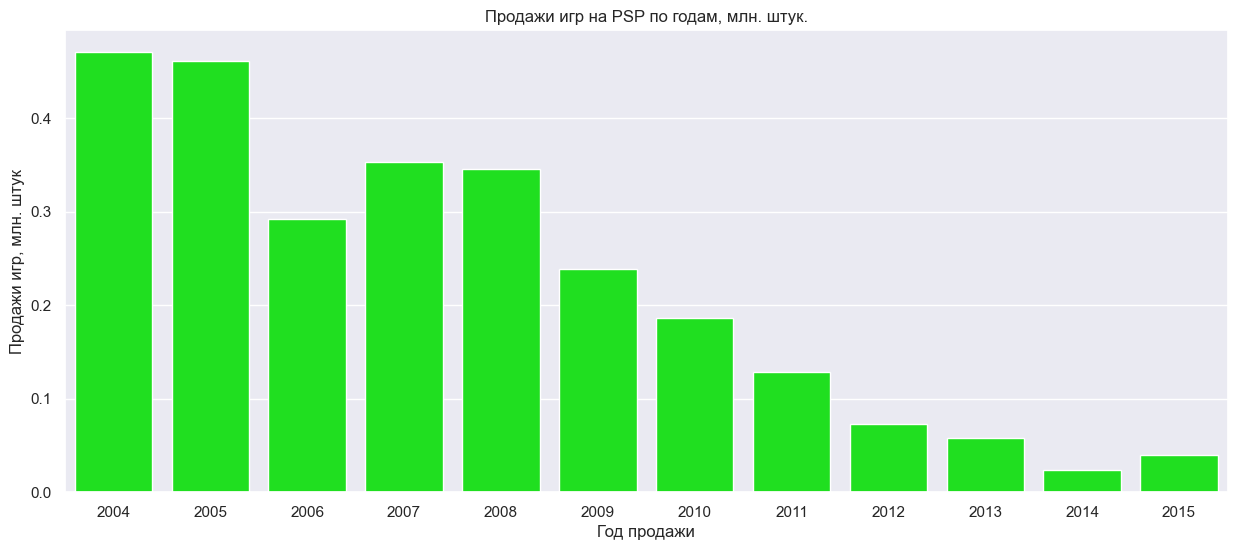

In [36]:
# визуализируем данные для платформы PSP
ax = sns.barplot(x=platform_psp.year_of_release, y=platform_psp.total_sales, color='lime', errorbar=None)
ax.set(title='Продажи игр на PSP по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

А вот платформа PSP похоже уже своё изжила - данных 2016 год нет, да и общий спрос примерно менее 100 тысяч штук ежегодно, начиная с 2012 года. Пик популярности платформы 2004 - 2008 года. Пиковый спрос - 350 - 450 тысяч штук игр в год.

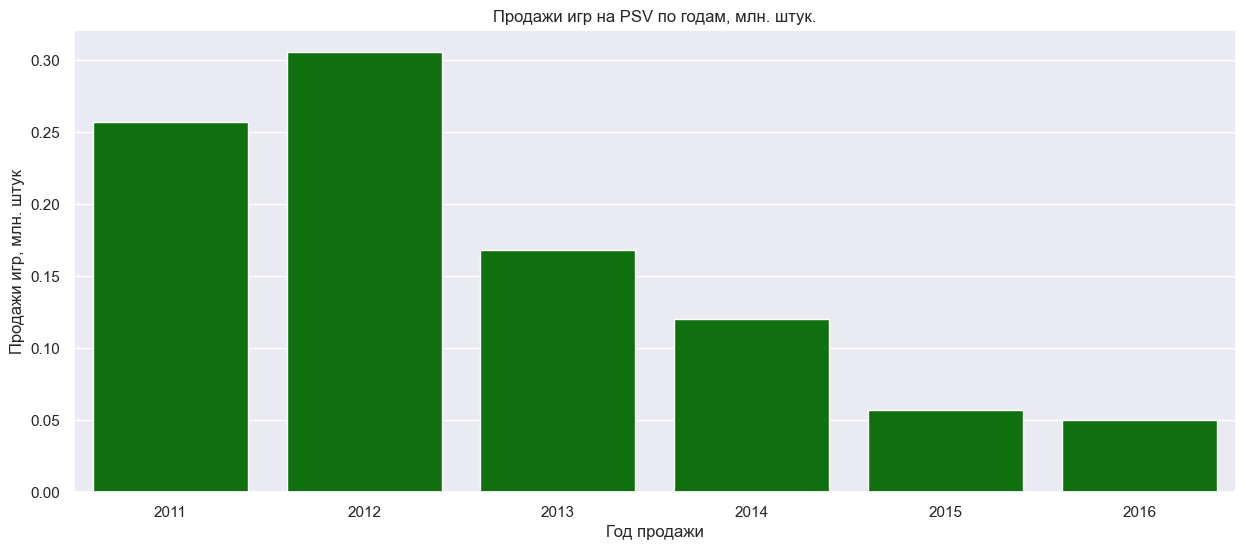

In [37]:
# визуализируем данные для платформы PSV
ax = sns.barplot(x=platform_psv.year_of_release, y=platform_psv.total_sales, color='green', errorbar=None)
ax.set(title='Продажи игр на PSV по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Ситуация с продажами игр на PSV обстоят так: сейчас наблюдается спад и продажи за последние 2 года составляют около 50 тыс. штук игр в год. Пик пришёлся на 2011 - 2012 года - продажи составляли тогда 250 - 300 тыс. штук игр в год.

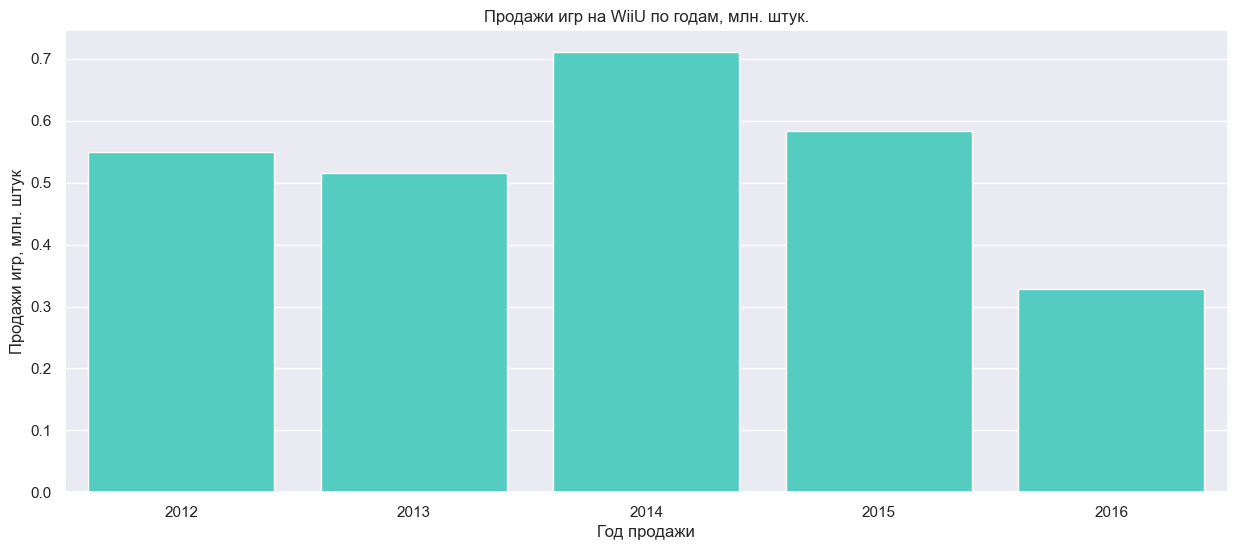

In [38]:
# визуализируем данные для платформы WiiU
ax = sns.barplot(x=platform_wiiu.year_of_release, y=platform_wiiu.total_sales, color='turquoise', errorbar=None)
ax.set(title='Продажи игр на WiiU по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

Продажи игр на WiiU начались в 2012 году. На пике продаж в 2014 году продажи составляли не многим более 700 тыс. Потом произошёл некоторый спад, но за 2016 год продажи всё равно более 320 тыс. штук, что весьма неплохо. Да и нужно учитывать - данные за 2016 год могут не полными.

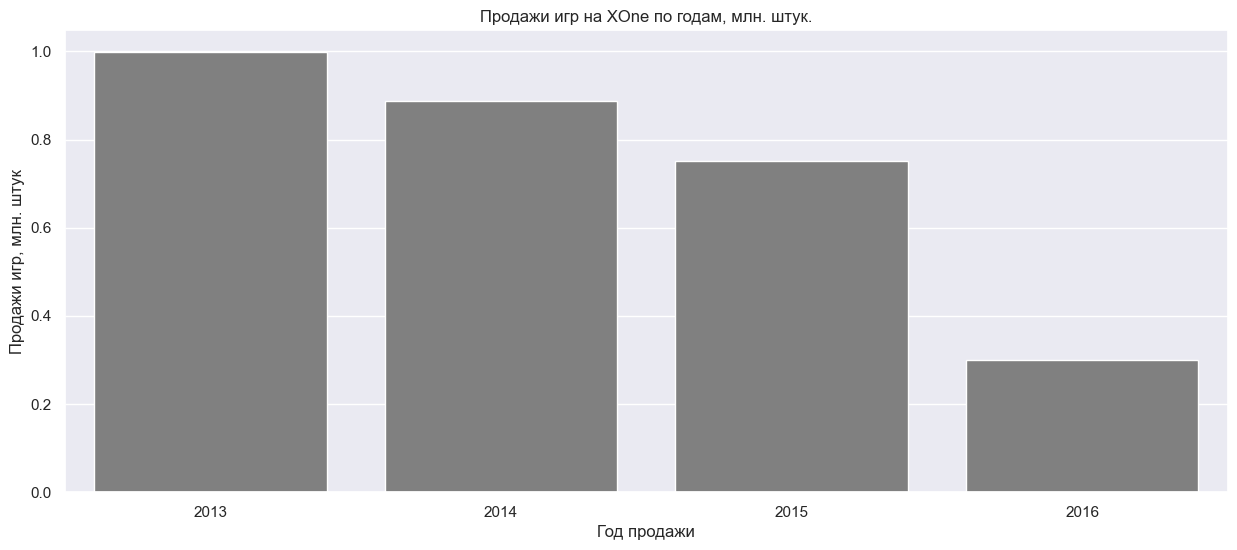

In [39]:
# визуализируем данные для платформы XOne
ax = sns.barplot(x=platform_xone.year_of_release, y=platform_xone.total_sales, color='grey', errorbar=None)
ax.set(title='Продажи игр на XOne по годам, млн. штук.', xlabel='Год продажи', ylabel='Продажи игр, млн. штук');

А по поводу XOne: продажи игр начинают падать. Примерно по 100 тыс. штук в год. в 2013 году было продано примерно 1 млн. штук. Сейчас в 2016 году данные порядка 300 тыс. штук. Но есть ощущуние, что данные неполные - ведь можно ожидать при линейном снижении продажи порядка 600 - 700 тыс. штук.

In [40]:
# дополнительная информация
display(ps3_sales_by_year.query('year_of_release >= 2014'))
display(wii_sales_by_year.query('year_of_release >= 2014'))
display(x360_sales_by_year.query('year_of_release >= 2014'))

,platform,year_of_release,total_sales
150,PS3,2014,47.760002
151,PS3,2015,16.820000
152,PS3,2016,3.600000


,platform,year_of_release,total_sales
205,Wii,2014,3.75
206,Wii,2015,1.14
207,Wii,2016,0.18


,platform,year_of_release,total_sales
222,X360,2014,34.740002
223,X360,2015,11.960000
224,X360,2016,1.520000


Текущие лидеры по продажам игр в 2016 году - это PS3 (3.6 млн. копий игр), Х360 (1.52 млн. копий игр). На остальных платформах продажи меньше и составляют не более 400 - 450 тыс. штук. Надо признать, что предположительно игры на PS3 и X360 могут ещё продаваться в 2017 году, но скорее всего, этот год продаж для них станет последним. Из новых платформ, которые могут "выстрелить" нужно отметить - 3DS, WiiU и XOne, но у них у всех сейчас продажи не более 300 - 350 тыс. копий игр в год. Есть ещё PS4 c продажами около 400 тыс. игр за год, но её доля снижается каждый год и относительно постоянная платформа PC, но продажи игр для неё около 100 тыс. игр в год, остальные платформы не стоят внимального изучения.

### Построение графика "ящик с усами" по глобальным продажам игр по платформам

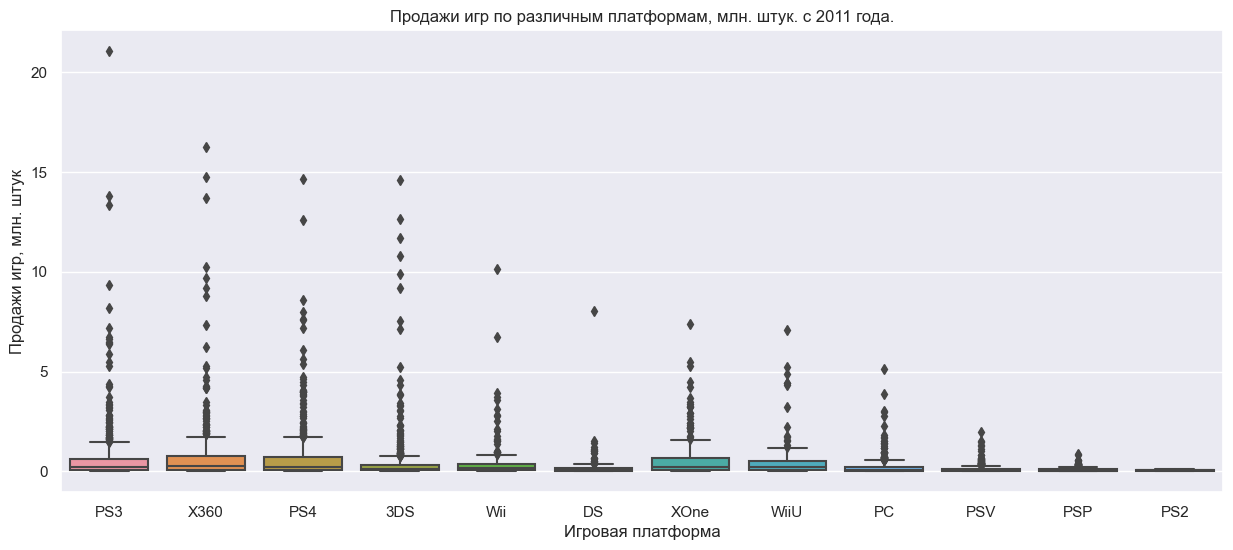

In [41]:
# строим график "ящик с усами"
ax = sns.boxplot(data=games.query('year_of_release >= 2011'), x='platform', y='total_sales')
ax.set(title = 'Продажи игр по различным платформам, млн. штук. с 2011 года.',\
       xlabel='Игровая платформа', ylabel='Продажи игр, млн. штук');

С 2011 года максимальное число проданных копий 1ой игры было немногим больше 20 млн. штук и было это на платформе PS3. Вообще подавляющее большинство игр (более 75%) продаётся в количестве не более 1 млн. копий. Игр, которые набрали продаж значительно больше 5 млн. копий не так уж и много по всем платформам. Например, на PC такая игра была только одна, на WiiU - 2, а максимум на PS3 таких игр было 13. На некоторых не очень популярных в это время платформах таких игр не было вообще. А рекорд по продажам одной игры набрала игра Wii Sports (платформа Wii) с продажами по всему миру более 82 млн. штук, но это было в 2006 году и в нашу таблицу это не вошло.

Но наш график вышел слишком шумный - много выборосов (и есть и очень далёкие выбросы) из-за которых не видно средних и не оценить реальный разброс данных. Поэтому построим график с ограничением по шкале y в 2 млн.

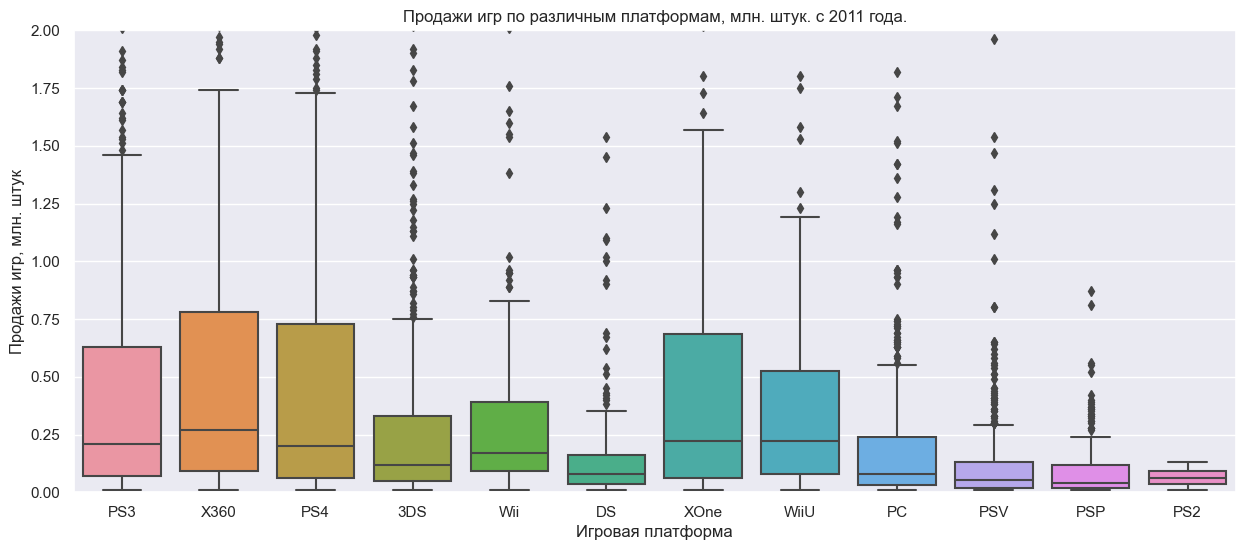

In [42]:
# повторно строим график "ящик с усами" с ограничением по шкале y в 2 млн. штук
ax = sns.boxplot(data=games.query('year_of_release >= 2011'), x='platform', y='total_sales')
ax.set(title = 'Продажи игр по различным платформам, млн. штук. с 2011 года.',\
       xlabel='Игровая платформа', ylabel='Продажи игр, млн. штук')
ax.set_ylim(0, 2);

Вот теперь мы видим, что крупнейшие платформы имеют средние продажи игры не более 260 тыс. штук. Впереди 5 платформ: X360, XOne, WiiU, PS3 и PS4. По третьему квартилю выделяются платформы X360, PS4, XOne - на них 75% значений приходится от 700 до 800 млн. штук копий с 1 игры.

### Влияние на продажи внутри одной популярной платформы отзывов критиков и пользователей

Напомним: выведенные ранее самые популярные платформы за всё время - это PS2, X360, PS3, Wii, DS и PS. В качестве примера для оценки влияния на продажи отзывов критиков и пользователей мы возьмём PS2.

C:\Users\USER\AppData\Local\Temp\ipykernel_3644\1507160739.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(impact_on_game_sales_ps2.corr(), annot=True, cmap='coolwarm')


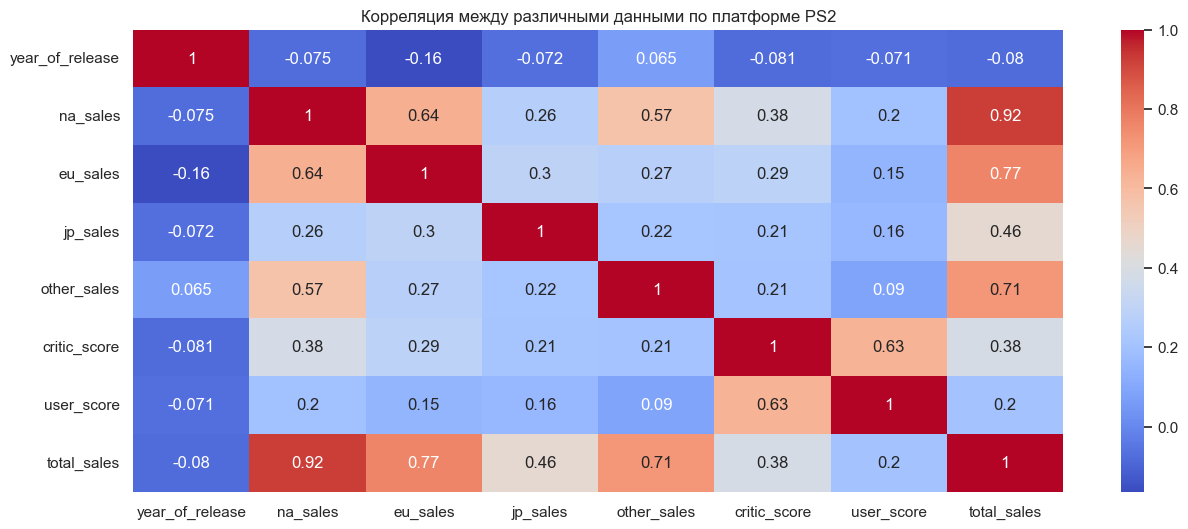

In [43]:
# отбираем нужные нам данные для оценки влияния
impact_on_game_sales_ps2 = games.query("platform == 'PS2' & ~critic_score.isna()")

# считаем корреляцию между значениями
ax = sns.heatmap(impact_on_game_sales_ps2.corr(), annot=True, cmap='coolwarm')
ax.set(title='Корреляция между различными данными по платформе PS2');

Итак мы имеем не очень сильную взаимосвязь между оценками критиков и суммарнными продажами игры на PS2. Но она есть и явно положительна, т.е. чем выше оценка критиков, тем больше продажи, но это не абсолютно. Коэффициент корреляции - 0.38. Влияние оценок пользователей на продажи менее существенно, чем критиков. Однако влияние всё равно положительно - коэффициент корреляции 0.2. Из этой таблицы можно заметить особенность: очень сильную взаимосвязь между продажами в общем и продажами в Северной Америке. Коэффициент корреляции - 0.92. Это означает, что подвляющее большинство продаж по этой платформе (PS2) было в Северной Америке.

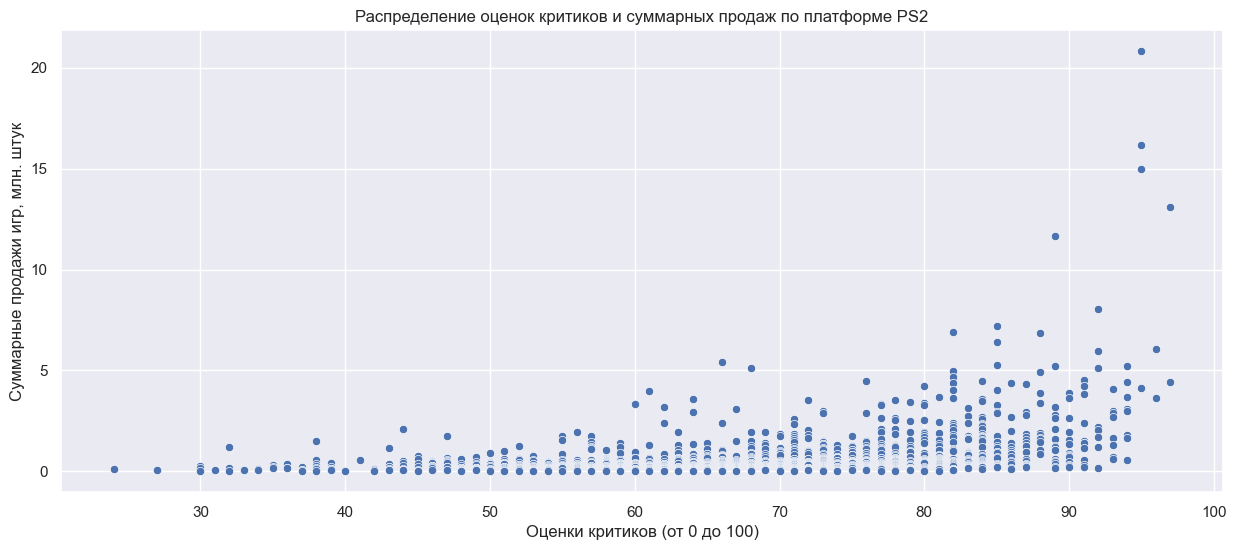

In [44]:
# строим диаграмму рассеивания между общими продажами и оценками критиков
ax = sns.scatterplot(data=impact_on_game_sales_ps2, y='total_sales', x='critic_score')
ax.set(title='Распределение оценок критиков и суммарных продаж по платформе PS2', ylabel='Суммарные продажи игр, млн. штук',\
      xlabel='Оценки критиков (от 0 до 100)');

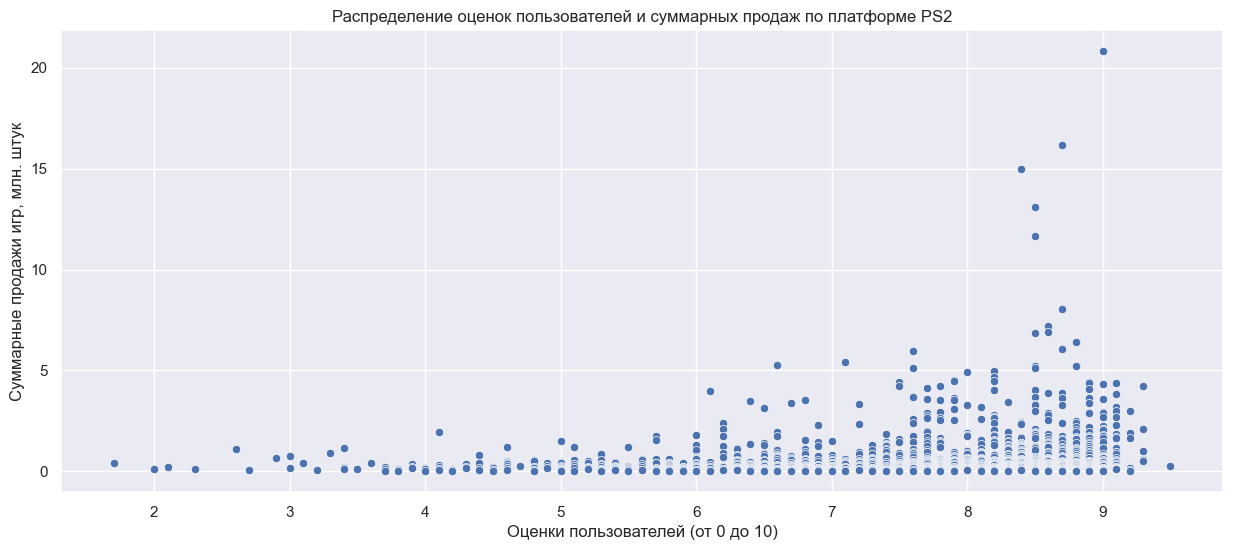

In [45]:
# строим диаграмму рассеивания между общими продажами и оценками пользователей
ax = sns.scatterplot(data=impact_on_game_sales_ps2, y='total_sales', x='user_score')
ax.set(title='Распределение оценок пользователей и суммарных продаж по платформе PS2',\
       ylabel='Суммарные продажи игр, млн. штук', xlabel='Оценки пользователей (от 0 до 10)');

Диаграммы рассеивания подтерждают сделанные ранее выводы: более высокие оценки и пользователей и критиков положительно влияют на продажи, но оценки критиков влияют на них значительно сильнее. Но ни одна оценка не является абсолютным показателем того, что продаж у игры будет однозначно больше, чем у игры с менее высокой оценкой.

### Соотнесение влияния оценок критиков и пользователей на продажи игры с другими платформами 

Сделаем по следующему плану: сначала возьмём ещё 2 популярных платформы (чтобы убедиться, что наши данные не случайны), а затем посмотрим влияние оценок пользователей и критиков на продажи всех наших игр.

C:\Users\USER\AppData\Local\Temp\ipykernel_3644\1647044483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(games.query("platform == 'X360' & ~critic_score.isna()").corr(), annot=True, cmap='coolwarm')


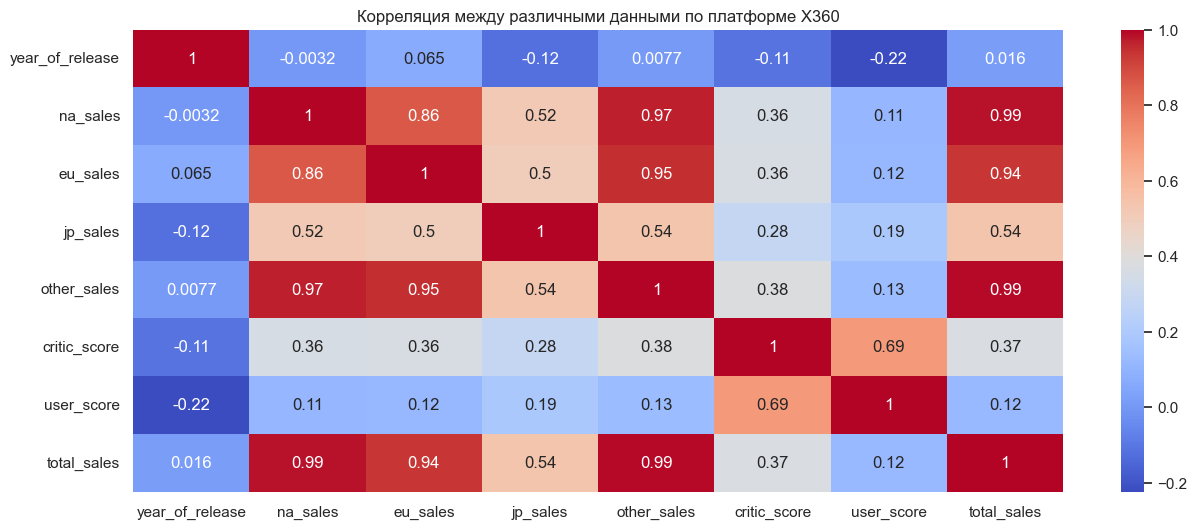

In [46]:
# вляние оценок критиков и пользователей на продажи на платформе X360
ax = sns.heatmap(games.query("platform == 'X360' & ~critic_score.isna()").corr(), annot=True, cmap='coolwarm')
ax.set(title='Корреляция между различными данными по платформе X360');

На продажи игр по платформе X360 оценки критиков влияют немного слабее, чем на PS2. Но влияние снова положительное (0.37), а вот оценки пользователей влияют на оценку слабо, но положительно (0.12).

C:\Users\USER\AppData\Local\Temp\ipykernel_3644\4227178261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(games.query("platform == 'PS3' & ~critic_score.isna()").corr(), annot=True, cmap='coolwarm')


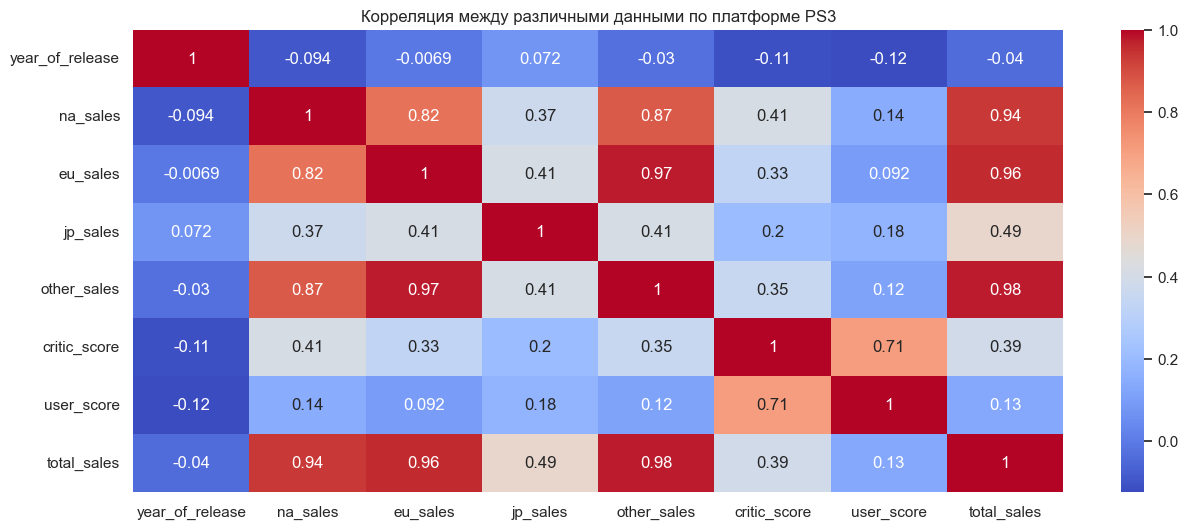

In [47]:
# вляние оценок критиков и пользователей на продажи на платформе PS3
ax = sns.heatmap(games.query("platform == 'PS3' & ~critic_score.isna()").corr(), annot=True, cmap='coolwarm')
ax.set(title='Корреляция между различными данными по платформе PS3');

Оценки критиков и оценки пользователей влияют на продажи по платформе PS3 почти также как и по платформе X360. Даже цифры почти совпадают.

C:\Users\USER\AppData\Local\Temp\ipykernel_3644\3487297249.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(games.query("~critic_score.isna()").corr(), annot=True, cmap='coolwarm')


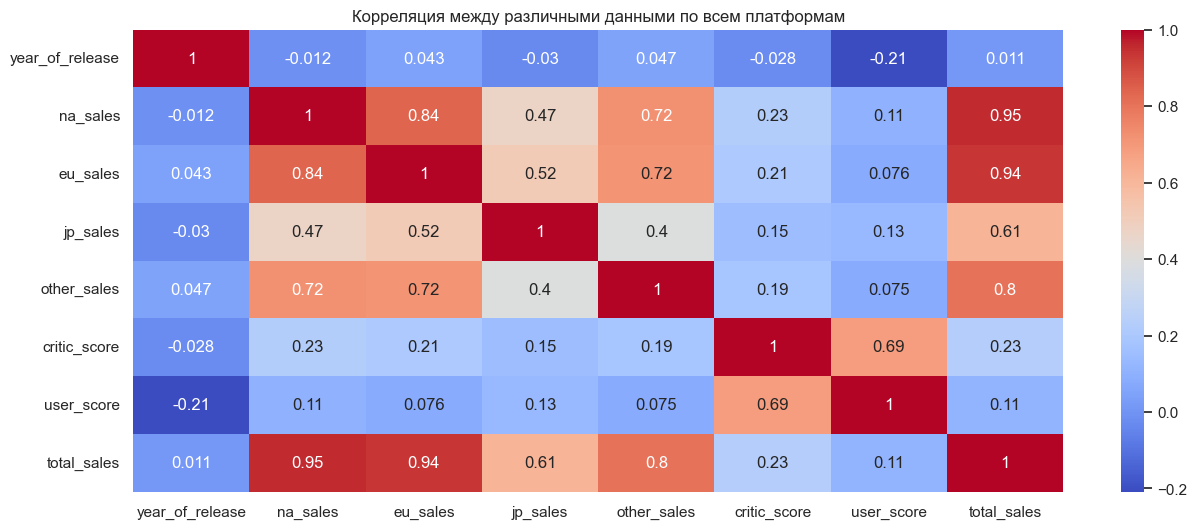

In [48]:
# вляние оценок критиков и пользователей на продажи по всем платформам 
ax = sns.heatmap(games.query("~critic_score.isna()").corr(), annot=True, cmap='coolwarm')
ax.set(title='Корреляция между различными данными по всем платформам');

А вот и разница! Если считать по данным по всем платформам, то влияние оценок критиков на общие продажи игр будет значительно слабее, чем на крупнейших платформах. Но всё равно, хотя и слабая взаимосвязь, но прослеживается - более высокие оценки критиков ассоциируются с более высокими продажами игр в целом. Среди всех платформ это влияние 0.23, а среднее между тремя крупнейшими платформами - 0.38. Оценки пользователей влияют на продажи игры крайне слабо, но положительно (0.11). Это примерно соотвествует 2 из 3 крупнейших игровых платформ. Также эти данные наглядно говорят, что пользователи гораздо более охотно купят игру, о которой хорошо отзываются критики, чем нежели другие пользователи.

### Изучаем распределение игр по жанрам и находим самые прибыльные жанры

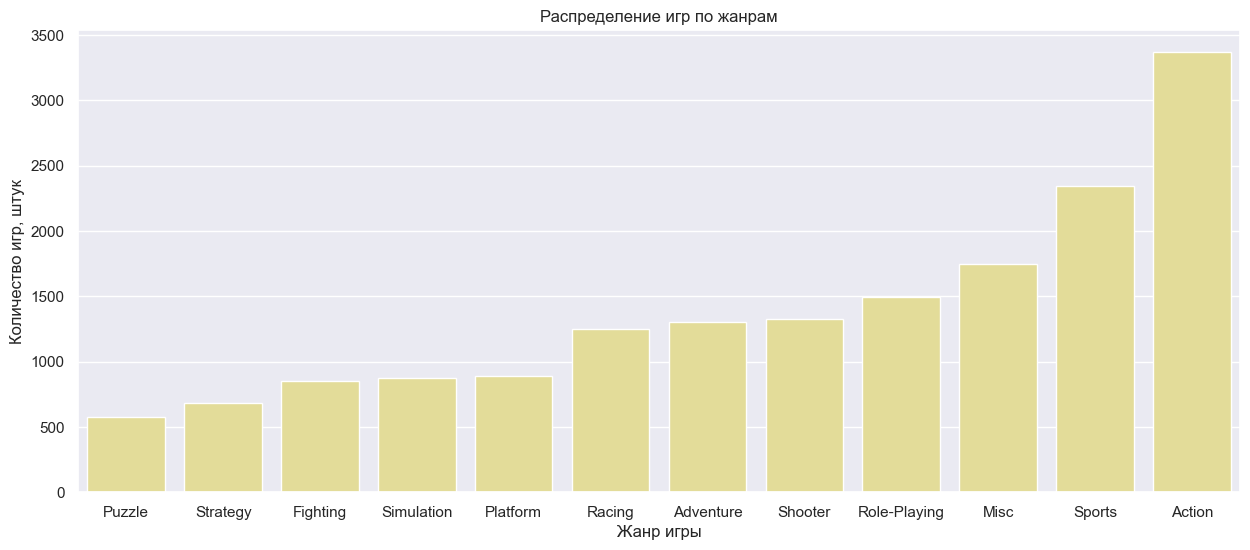

In [49]:
# подготовим данные к визуализации
shape_games = games.shape # размер датафрейма - для определения доли игр различных жанров
games_by_genre = games.groupby('genre', as_index=False).agg({'name': 'count', 'total_sales': 'sum'})
games_by_genre['share_games_by_genre'] = games_by_genre.name / shape_games[0] # доля игр одного жанра от общего количества игр
games_by_genre['average_sales_game'] = games_by_genre.total_sales / games_by_genre.name # средние продажи 1 игры данного жанра
# переименуем столбцы для лучшего понимания что есть что
games_by_genre.columns = ['genre', 'count_games_by_genre', 'total_sales_by_genre', 'share_games_by_genre', 'average_sales_game']

# сколько у нас игр различных жанров?
ax = sns.barplot(data=games_by_genre.sort_values(by='count_games_by_genre'), x='genre', y='count_games_by_genre', color='khaki')
ax.set(title='Распределение игр по жанрам', xlabel='Жанр игры', ylabel='Количество игр, штук');

Больше всего у нас игр жанра Action (Действие- экшн-игры). Их примерно 3.4 тысяч штук. Далее идут спортивные игры. Их примерно 2300 штук. Далее идут игры с жанром Misc (разное). Их примерно 1700. А два самых непопулярных жанра - Puzzle (Говололомки) и Strategy (Стратегии). Их примерно 600 и 700 соответственно.

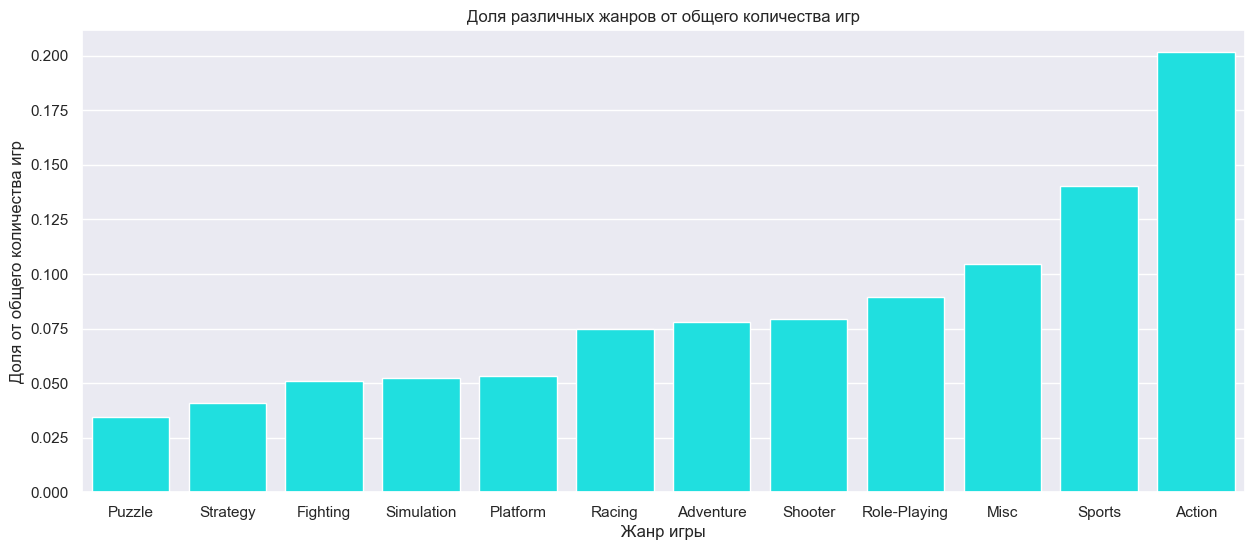

In [50]:
# а какие это доли от общего количества игр?
ax = sns.barplot(data=games_by_genre.sort_values(by='share_games_by_genre'), x='genre', y='share_games_by_genre', color='cyan')
ax.set(title='Доля различных жанров от общего количества игр', xlabel='Жанр игры', ylabel='Доля от общего количества игр');

Итак у нас игр жанра Action (Действие- экшн-игры) примерно 20% от общего числа, Спортивных игр - примерно 14%, игр жанра Misc (разное) немногим более 10%, а самых редких жанров Puzzle (Говололомки) и Strategy (Стратегии) - примерно 3 и 3.5%. 

Итак: количество игр, как и их доли различаются значительно. Но вот как это влияет на продажи? Что нам лучше закупать?

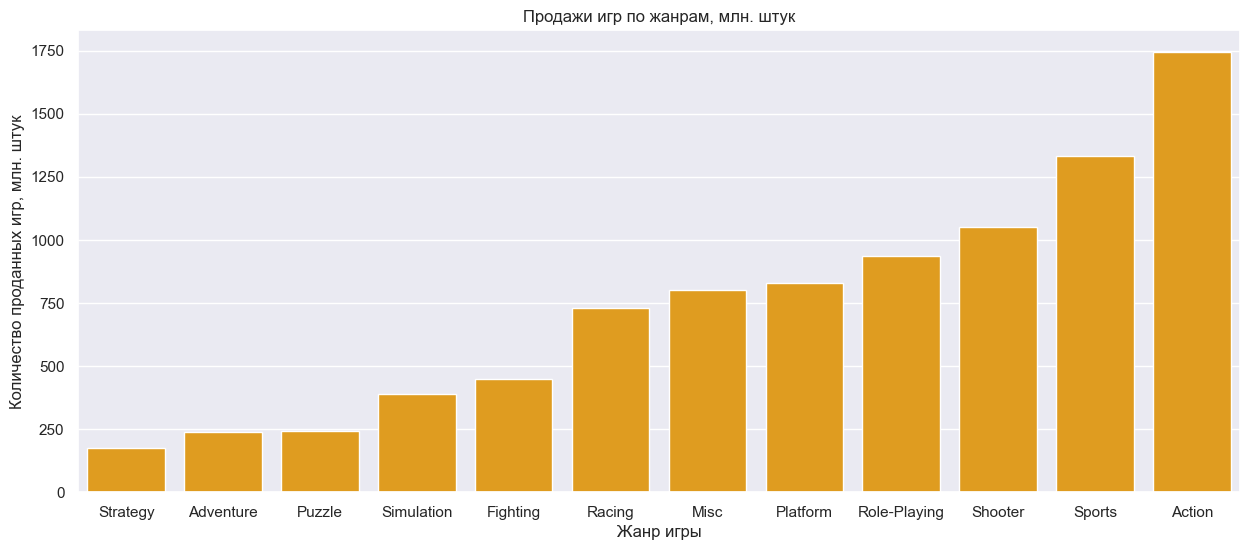

In [51]:
# Находим влияние на продажи отнесение игр к различным жанрам
ax = sns.barplot(data=games_by_genre.sort_values(by='total_sales_by_genre'),x='genre', y='total_sales_by_genre', color='orange')
ax.set(title='Продажи игр по жанрам, млн. штук', xlabel='Жанр игры', ylabel='Количество проданных игр, млн. штук');

Выпуск игр в определённом жанре влияет на продажи: больше всего игр продаётся в жанре Action (Действие- экшн-игры). Игр с этим жанром продано примерно 1750 млн. штук. Спортивных игр было продано примерно 1300 млн. штук. Далее идут игры жанра Shooter (Стрелялки) - их было  продано немногим более 1000 млн. штук. 3 самых непопулярных жанра по продажам игр - это стратегии, игры жанра Adventure (Приключения) и Говололомки - их продано не более 250 млн. штук.

Здесь мы наблюдаем несоотвествия между количеством выпущенных игр и их продажами. Экшн-игры и спортивные на первых двух местах это понятно, но вот Стрелялки, оказались, несмотря на значительно меньшее количество намного более популярны, чем игры с жанром Misc (Разное). Да и жанр Приключения тоже продавался плохо, опустившись даже ниже Говололомок, которых выпускали в 2 раза меньше.

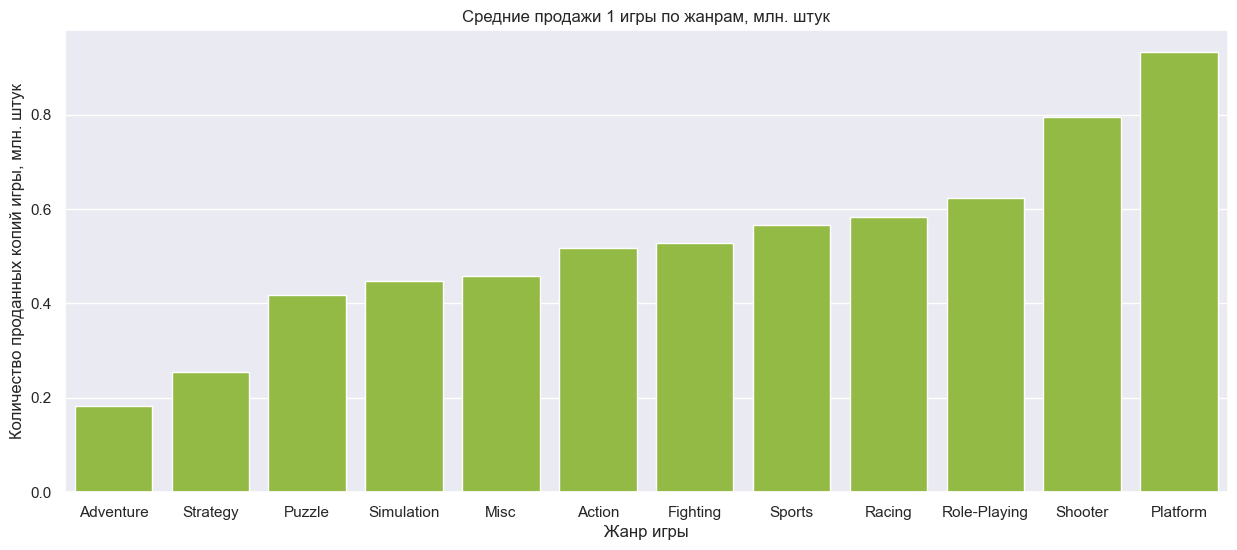

In [52]:
# сколько в среднем продаж у одной игры конкретного жанра?
ax = sns.barplot(data=games_by_genre.sort_values(by='average_sales_game'), x='genre', y='average_sales_game', \
                 color='yellowgreen')
ax.set(title='Средние продажи 1 игры по жанрам, млн. штук', xlabel='Жанр игры',\
       ylabel='Количество проданных копий игры, млн. штук');

Разумеется показатель продаж уже интересен тем, что он очищен от количества игр и позволяет понять как именно будет продаваться игра с определённым жанром в целом. И вот тут уже интересно: игры с жанром Platform (Платформеры) уверенно лидируют с средними продажами более 900 тыс. копий на 1 игру, второе метро занимают игры с жанром Shooter (Стрелялки) - их продают в средней около 800 тыс. копий на 1 игру, третье место занимают Ролевые игры с продажами немногим более 600 тыс. копий на одну игру. А вот жанры Adventure (Приключения) и Strategy (Стратегии) особым спросом не пользуются - их продают около 190 и 230 тысяч копий на одну игру соответственно.

Но мы брали статистику за всё время, а тренды за это время могли измениться. Надо для большей точности провести такой расчёт за актульный период. Напомню: расчётный актуальный период - 6 лет, т.е. начиная с 2011 года. 

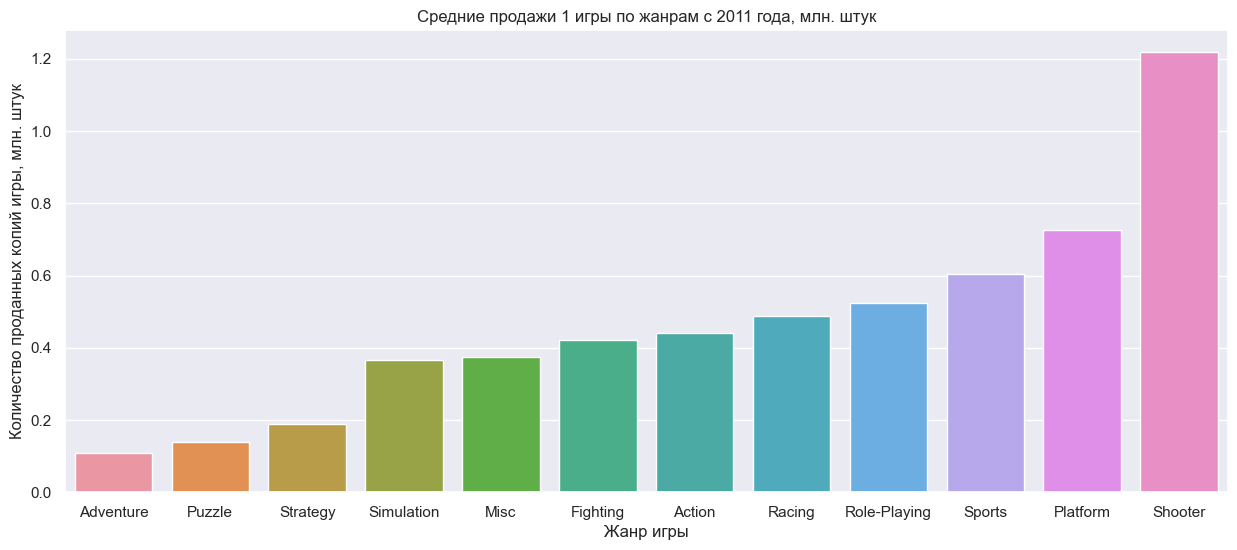

In [53]:
# пересчитаем статистику продаж одной игры определённого жанра за актуальный период
games_by_genre_current_period = games.query('year_of_release >= 2011').groupby('genre', as_index=False).agg({'name': 'count', 'total_sales': 'sum'})
games_by_genre_current_period['share_games_by_genre'] = games_by_genre_current_period.name / games_by_genre_current_period.name.sum() 
games_by_genre_current_period['average_sales_game'] = games_by_genre_current_period.total_sales / games_by_genre_current_period.name
# переименуем столбцы для лучшего понимания что есть что
games_by_genre_current_period.columns = ['genre', 'count_games_by_genre', 'total_sales_by_genre', 'share_games_by_genre', 'average_sales_game']

# визуализируем полученный результат
ax = sns.barplot(data=games_by_genre_current_period.sort_values(by='average_sales_game'), \
                 x='genre', y='average_sales_game')
ax.set(title='Средние продажи 1 игры по жанрам c 2011 года, млн. штук', xlabel='Жанр игры', \
       ylabel='Количество проданных копий игры, млн. штук');

Наше предположение было верным: действительно в актульном периоде мода на игры изменилась. Больше всего теперь попупают игры с жанром Shooter (Стрелялки) - их продажи в среднем более 1.2 миллиона копий одной игры. Далее идут игры с жанром Platform (Платформеры) - их покупают немногим более 700 тыс. копий одной игры и замыкает тройку лидеров современных продаж Спортивные игры. А вот непопулярные жанры остались теми же - как игры жанров Adventure, Puzzle и Strategy особо не брали, так и не берут. Более того спрос на игры этих жанров даже сократился и составляет сейчас менее 200 тысяч копий  на каждую из игр этих жанров.

Но раз так сильно изменились продажи одной игры не изменились ли продажи игр в целом, их доли, количество выпущенных игр. надо проверять.

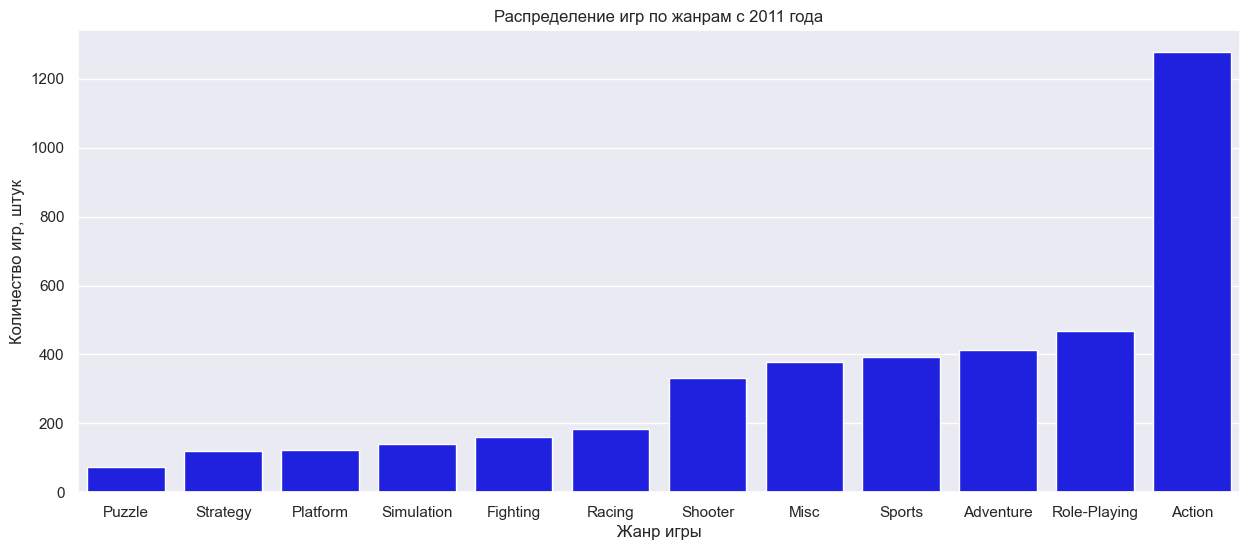

In [54]:
# как изменилось распеределение игр по жанрам?
ax = sns.barplot(data=games_by_genre_current_period.sort_values(by='count_games_by_genre'), \
                 x='genre', y='count_games_by_genre', color='blue')
ax.set(title='Распределение игр по жанрам c 2011 года', xlabel='Жанр игры', ylabel='Количество игр, штук');

Итак отличие современного периода от общего: 3 самых популярных жанра игр с 2011 года - это Action, Role-Playing и Adventure. За весь срок было: Action, Sports, Misc. Изменение вкусов разработчиков на лицо. Бросается в глаза также и то что игр с жанром Action намного больше, чем всех остальных. А вот тройка самых непопулярных жанров у разработчиков почти не изменилась - с 2011 года эти жанры - Puzzle, Stretagy и Platform, а за всё время - Puzzle, Stretagy и Fighting. Теперь сравним доли различных игр.

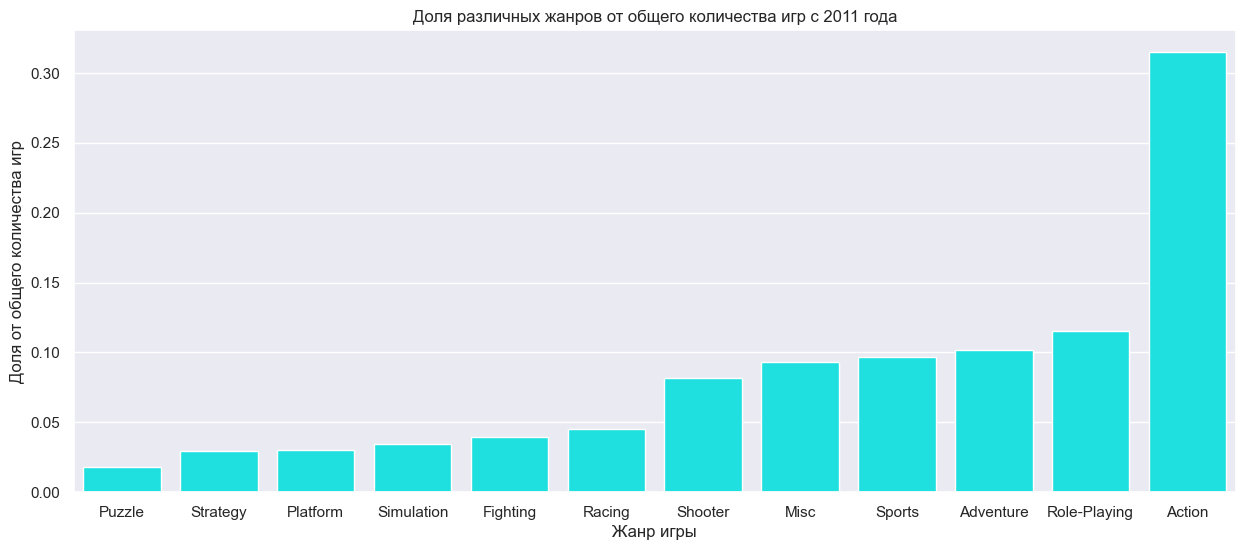

In [55]:
# а как изменились доли от общего количества игр?
ax = sns.barplot(data=games_by_genre_current_period.sort_values(by='share_games_by_genre'), \
                 x='genre', y='share_games_by_genre', color='cyan')
ax.set(title='Доля различных жанров от общего количества игр c 2011 года', xlabel='Жанр игры', \
       ylabel='Доля от общего количества игр');

Таким образом: разработка игр жанра Action с 2011 выросла и сейчас составляет более 30% от общего объёма выпуска всех игр за счёт игр всех остальных жанров.

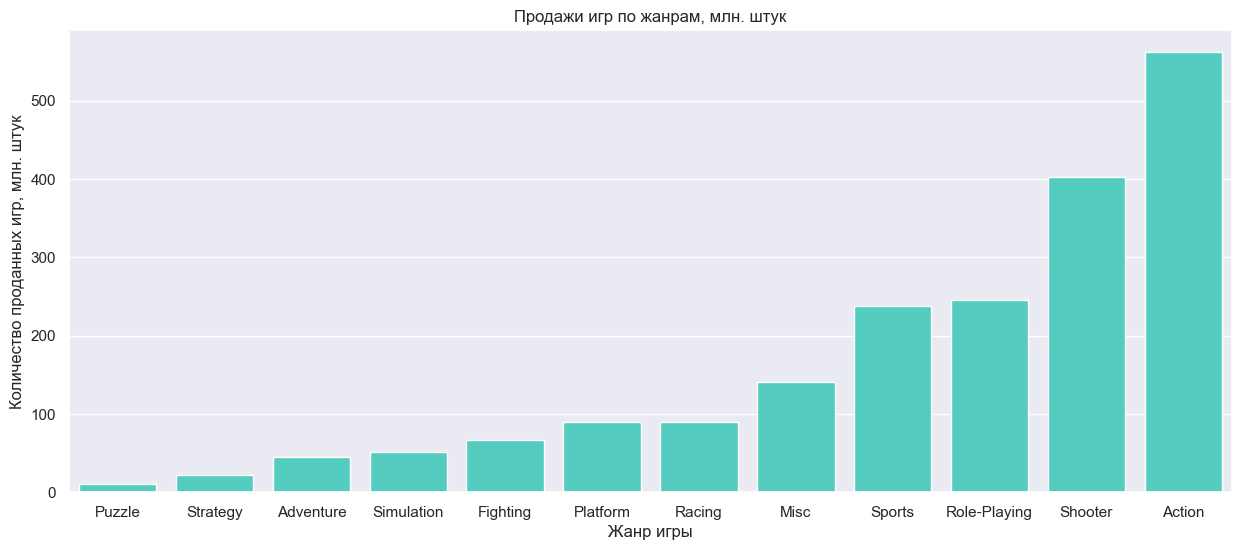

In [56]:
# Находим влияние на продажи отнесение игр к различным жанрам в настоящем периоде
ax = sns.barplot(data=games_by_genre_current_period.sort_values(by='total_sales_by_genre'),\
                 x='genre', y='total_sales_by_genre', color='turquoise')
ax.set(title='Продажи игр по жанрам, млн. штук', xlabel='Жанр игры', ylabel='Количество проданных игр, млн. штук');

Итак, самые продаваемые игры с 2011 года имеют жанры - Action, Shooter и Role-Playing. За всё время самые продаваемые игры имели жанры - Action, Sports, Shooter. В общем разница не такая уж и большая, если учесть, что жанр Sports в настоящее время идёт 4ым по популярности и лишь немного отстаёт от Ролевых игр. А вот тройка самых не продавамых жанров не изменилась. Ими стали Puzzle, Strategy и Adventure. изменился лишь ёе порядок, но это не суть важно.

Общий вывод по поводу игр с самыми популярными жанрами: поскольку у нас есть большая разница между популярными играми вообще и популярными играми в актуальном периоде надо ориентироваться на актульный период. А в нём самые продаваемые игры имеют жанры Action, Shooter и Role-Playing. А игры которые имеет наибольшие продажи с 1 игры в актуальном периоде имеют жанры Shooter, Platform и Sports. Отсюда следует, что надо выбирать для продаж в 2017 году игры с жанрами Shooter, Platform, Sports, Action и Role-Playing. А вот игр с жанрами Puzzle, Strategy и Adventure лучше избергать - много их не продать и продажи с каждой конкретной игры невелики.

## Составляем портрет пользователя для каждого региона

### Находим самые популярные игровые платформы для регионов NA (Северная Америка), EU (Европа), JP (Япония)

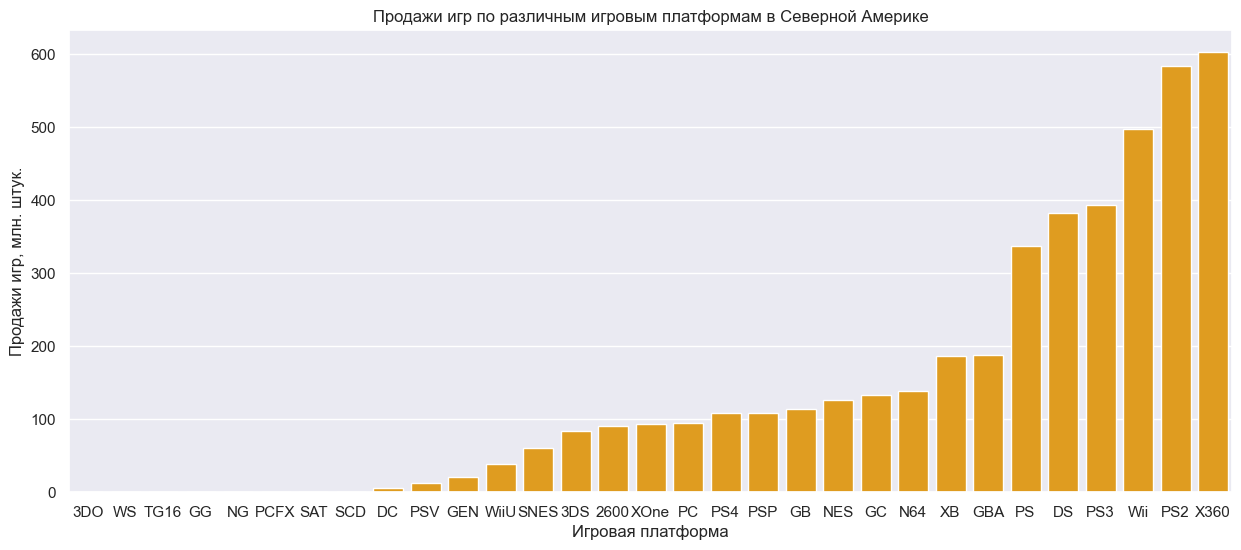

In [57]:
# Визуализируем продажи игр по различным платформам в Северной Америке
ax = sns.barplot(data=games.groupby('platform', as_index=False).na_sales.sum().sort_values(by='na_sales'),\
                 x='platform', y='na_sales', color='orange')
ax.set(title='Продажи игр по различным игровым платформам в Северной Америке',\
       xlabel='Игровая платформа', ylabel='Продажи игр, млн. штук.');

Самые популярные игровые платформы в Северной Америке - это X360, PS2, Wii, PS3 и DS. Ещё достаточно крупная платформа это PS. Остальные менее распостранены или во всяком случае под них гораздо меньше продавали игр. 

In [59]:
# какая доля продаж игр у этих самых крупных платформ от общего числа продаж игр?
sales_games_by_platform_in_na = games.groupby('platform', as_index=False).na_sales.sum().sort_values(by='na_sales', ascending=False)
sales_games_by_platform_in_na['share_game_sales'] = sales_games_by_platform_in_na.na_sales / sales_games_by_platform_in_na.na_sales.sum()
print('Доля продаж игр 5 крупнейших игровых платформ в Северной Америке равна' ,f'{sales_games_by_platform_in_na.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 крупнейших игровых платформ в Северной Америке равна 55.86%


Доля 5 крупнейших игровых платформ в Америке больше 55%. Довольно показательно. Отстаётся довавить только то, что ряяд платформ в Америке или не представлены вообще или же почти не пользуются спросом. Это игровые платформы 3DO, WS, TG16, GG, NG, PCFX, SAT и SCD. 

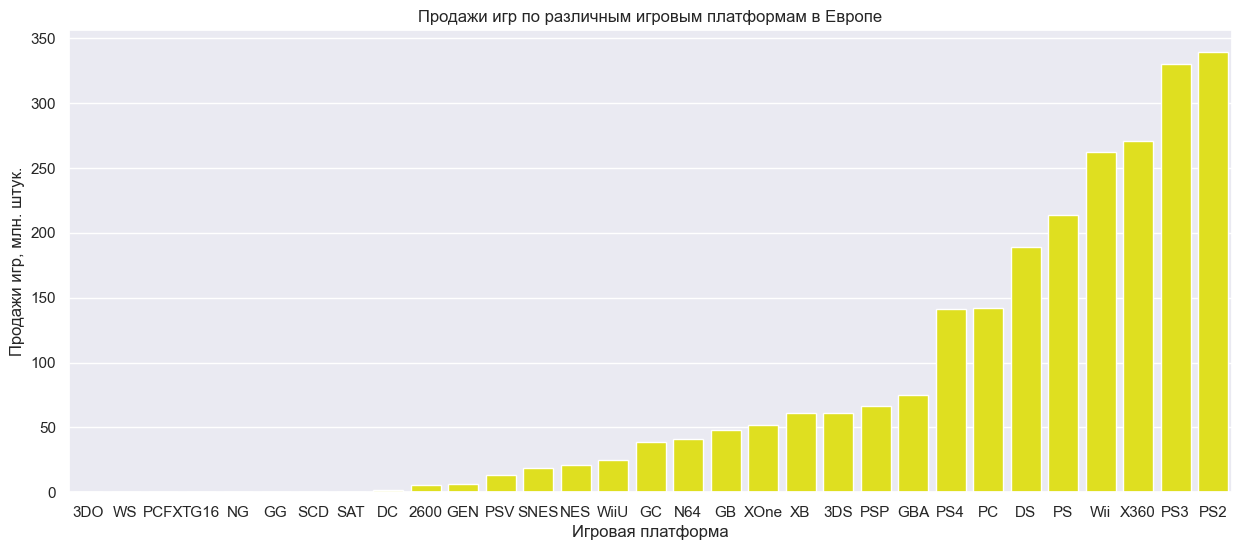

In [58]:
# Визуализируем продажи игр по различным платформам в Европе
ax = sns.barplot(data=games.groupby('platform', as_index=False).eu_sales.sum().sort_values(by='eu_sales'),\
                 x='platform', y='eu_sales', color='yellow')
ax.set(title='Продажи игр по различным игровым платформам в Европе',\
       xlabel='Игровая платформа', ylabel='Продажи игр, млн. штук.');

Самые популярные игровые платформы в Европе - это PS2, PS3, X360, Wii и PS. Ещё достаточно крупная платформа это DS. Остальные менее распостранены или во всяком случае под них гораздо меньше продавали игр. Ещё момент на который надо обратить внимание - размерность данных: В Севарной Америке продажи достигали на крупнейшей платформе - 600 млн. штук, а здесь приблизительно 340 млн. штук. Что говорит о том, что в Северной Америке продают гораздо больше игр в целом. А вот разница в крупнейших платформах невелика. Среди первой 6ки по продажам разница лишь в их порядке. 

А какую долю от всех продаж игр они занимают?

In [60]:
# какая доля продаж игр у этих самых крупных платформ от общего числа продаж игр?
sales_games_by_platform_in_eu = games.groupby('platform', as_index=False).eu_sales.sum().sort_values(by='eu_sales', ascending=False)
sales_games_by_platform_in_eu['share_game_sales'] = sales_games_by_platform_in_eu.eu_sales / sales_games_by_platform_in_eu.eu_sales.sum()
print('Доля продаж игр 5 крупнейших игровых платформ в Европе равна' ,f'{sales_games_by_platform_in_eu.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 крупнейших игровых платформ в Европе равна 58.41%


Доля 5 крупнейших игровых платформ в Европе больше 58%. Даже больше, чем в Северной Америке. Тоже показательно. Отстаётся довавить только то, что ряд платформ в Европе или не представлены вообще или же почти не пользуются спросом. Это игровые платформы 3DO, WS, PCFX, TG16, GG, NG, GG,  SCD, SAT и DC. Редкие платформы почти такие же, как в Северной Америке.

А вот Япония оригинальна. Но продаж меньше, чем в Северной Америке или Европе. Крупнейшие игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Ещё достаточно крупная платформа это NES. Платформы, которые не пользуются спросом в Японии это 2600, PCFX, GG, 3DO, TG16, PC, XOne и SCD. Теперь посмотрим на долю крупнейших платформ в Японии.

In [61]:
# какая доля продаж игр у этих самых крупных платформ от общего числа продаж игр в Японии?
sales_games_by_platform_in_jp = games.groupby('platform', as_index=False).jp_sales.sum().sort_values(by='jp_sales', ascending=False)
sales_games_by_platform_in_jp['share_game_sales'] = sales_games_by_platform_in_jp.jp_sales / sales_games_by_platform_in_jp.jp_sales.sum()
print('Доля продаж игр 5 крупнейших игровых платформ в Японии равна' ,f'{sales_games_by_platform_in_jp.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 крупнейших игровых платформ в Японии равна 51.78%


И доля 5 крупнейших игровых платформ в Японии меньше, чем в Европе или Северной Аммерике, но всё равно больше 50%. Если добавить ещё шестую игровую платформу по популярности (NES), то их доля превысит 59%. Что говорит о том, что доли продаж игр в Японии распределяются более равномерно, чем в Северной Америке или Европе.

Можно предположить, что предпочтения по жанрам игр будут гораздо сильнее различаться между Японией и другими регионами (Северной Америкой и Европой), эти регионы различаются между собой.

### Определяем самые популярные жанры игр для пользователей разных регионов (Северной Америки, Европы, Японии)

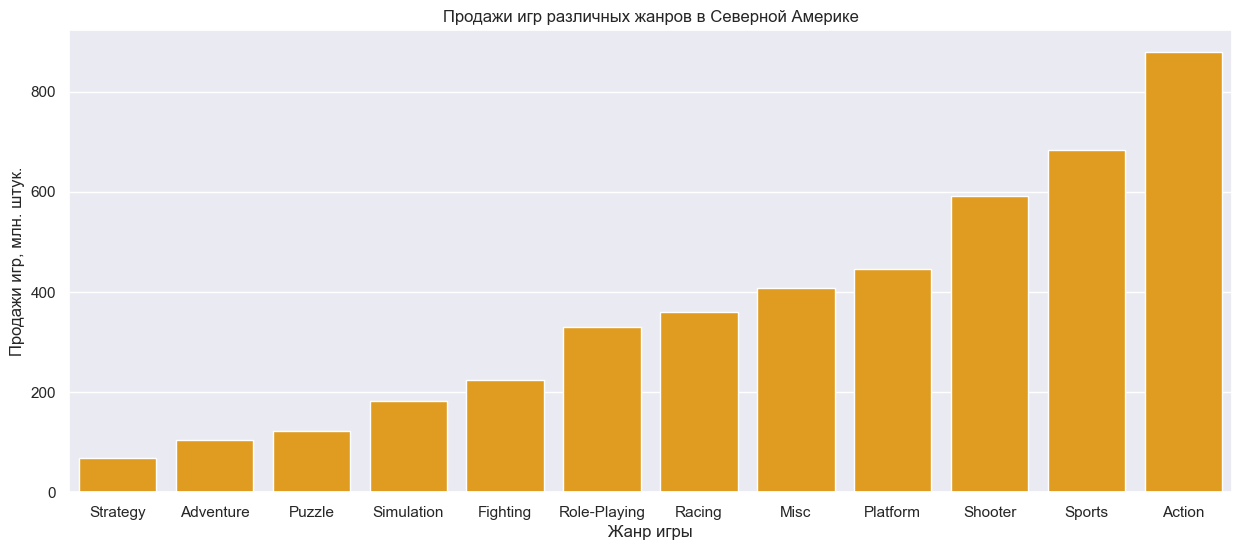

In [62]:
# определяем самые популярные жанры игр в Северной Америке
ax = sns.barplot(data=games.groupby('genre', as_index=False).na_sales.sum().sort_values(by='na_sales'),\
                 x='genre', y='na_sales', color='orange')
ax.set(title='Продажи игр различных жанров в Северной Америке',\
       xlabel='Жанр игры', ylabel='Продажи игр, млн. штук.'); 

В Северной Америке 5 жанров игры с наибольшими продажами это игры с жанрами Action, Sports, Shooter, Platform и Misc. На эти жанры приходится от 400 млн. штук до почти 900 млн. штук игр проданных. Непопулярные жанры - Strategy, Adventure и Puzzle. Но какая доля продаж игр приходиться на игры с этими 5 самыми распостранёнными жанрами в Северной Америке? 

In [63]:
# вычислем долю 5 самых распостранённых жанров игр в Северной Америке
sales_games_by_genre_in_na = games.groupby('genre', as_index=False).na_sales.sum().sort_values(by='na_sales', ascending=False)
sales_games_by_genre_in_na['share_game_sales'] = sales_games_by_genre_in_na.na_sales / sales_games_by_genre_in_na.na_sales.sum()
print('Доля продаж игр 5 самых распостранённых жанров в Северной Америке равна' ,f'{sales_games_by_genre_in_na.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 самых распостранённых жанров в Северной Америке равна 68.37%


Даже добавить нечего - почти 70% всех проданных игр приходиться на 5 самых распостранённых жанров. Достаточно много. А как в других регионах?

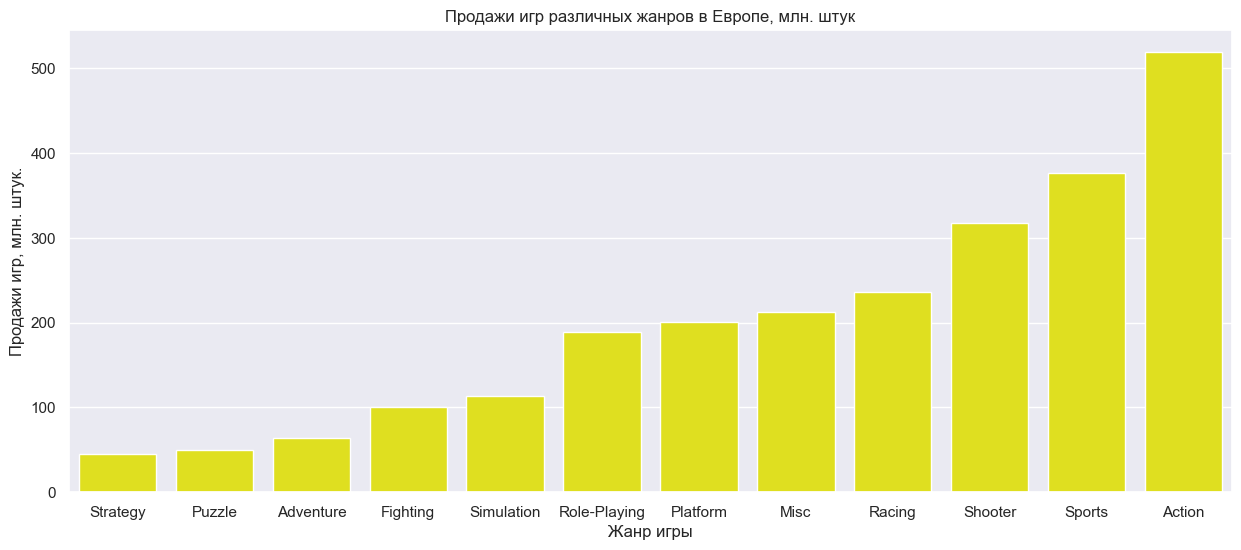

In [64]:
# определяем самые популярные жанры игр в Европе
ax = sns.barplot(data=games.groupby('genre', as_index=False).eu_sales.sum().sort_values(by='eu_sales'),\
                 x='genre', y='eu_sales', color='yellow')
ax.set(title='Продажи игр различных жанров в Европе, млн. штук',\
       xlabel='Жанр игры', ylabel='Продажи игр, млн. штук.'); 

В Европе 5 жанров игры с наибольшими продажами это игры с жанрами Action, Sports, Shooter, Racing и Misc. На эти жанры приходится от 200 млн. штук до более чем 500 млн. штук игр проданных. Непопулярные жанры - Strategy, Puzzle и Adventure. Но какая доля продаж игр приходиться на игры с этими 5 самыми распостранёнными жанрами в Европе?

In [65]:
# рассчитываем долю игр 5 самых популярных жанров в Европе
sales_games_by_genre_in_eu = games.groupby('genre', as_index=False).eu_sales.sum().sort_values(by='eu_sales', ascending=False)
sales_games_by_genre_in_eu['share_game_sales'] = sales_games_by_genre_in_eu.eu_sales / sales_games_by_genre_in_eu.eu_sales.sum()
print('Доля продаж игр 5 самых распостранённых жанров в Европе равна' ,f'{sales_games_by_genre_in_eu.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 самых распостранённых жанров в Европе равна 68.58%


Интересный момент доля 5 самых крупных жанров в Европе и Северной Америке почти совпадает. И есть полное совпадение среди 6 самых крупных жанров - вот только немного порядок другой. Похоже, предположение, что предпочтения пользователей в Северной Америке и Европе почти совпадают подтвердаются. А вот насколько велики отличия этих регионов от Японии? Проверим это. 

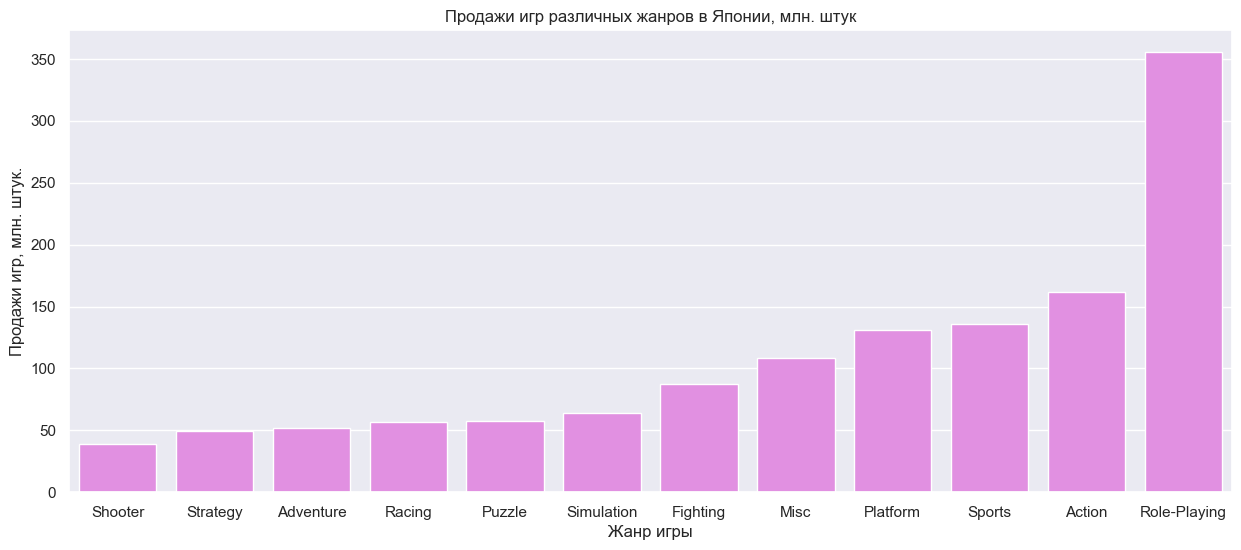

In [66]:
# определяем самые популярные жанры игр в Японии
ax = sns.barplot(data=games.groupby('genre', as_index=False).jp_sales.sum().sort_values(by='jp_sales'),\
                 x='genre', y='jp_sales', color='violet')
ax.set(title='Продажи игр различных жанров в Японии, млн. штук',\
       xlabel='Жанр игры', ylabel='Продажи игр, млн. штук.'); 

В Японии 5 жанров игры с наибольшими продажами это игры с жанрами Role-Playing, Action, Sports, Platform и Misc. На эти жанры приходится от примерно 110 млн. штук до немного больше 350 млн. штук игр проданных. Непопулярные жанры - Shooter, Strategy и Adventure. Как и предполагалось - отличия очень существенные: во-первых самый популярный жанр - Ролевые игры и они более чем в 2 раза популярнее любого любого другого жанра. Ни в Северной Америке, ни в Европе такой большой разницы не было. Во-вторых:  самый непопулярный жанр - Shooter (Стрелялки) - в Северной Америке и Европе этот жанр 3ий по популярности. Очевидно, что если наш магазин находится в Японии надо корректировать предложение и раздачу попурных вариантов под местный колорит. 

Но какая доля продаж игр приходиться на игры с этими 5 самыми распостранёнными жанрами в Японии? 

In [67]:
# рассчитываем долю игр 5 самых популярных жанров в Японии
sales_games_by_genre_in_jp = games.groupby('genre', as_index=False).jp_sales.sum().sort_values(by='jp_sales', ascending=False)
sales_games_by_genre_in_jp['share_game_sales'] = sales_games_by_genre_in_jp.jp_sales / sales_games_by_genre_in_jp.jp_sales.sum()
print('Доля продаж игр 5 самых распостранённых жанров в Японии равна' ,f'{sales_games_by_genre_in_jp.share_game_sales.head().sum():.2%}')

Доля продаж игр 5 самых распостранённых жанров в Японии равна 68.70%


А вот доля игр 5 самых популярных жанров снова почти одинакова во всех регионах продаж игр. Даже разность самих популярных жанров почти ничего для этого показателя не значит.

### Оцениваем влияние рейтинга ESRB на продажи в каждом из регионов

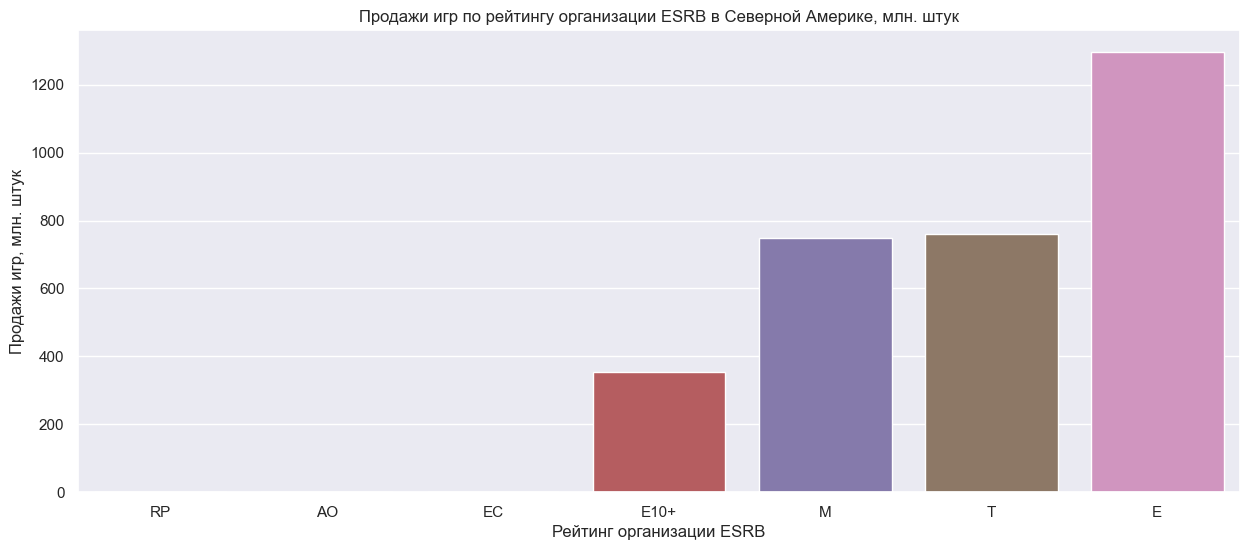

In [68]:
# подготавливаем данные для визуализации
rating_esrb_impact = games.groupby('rating',as_index=False).agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
rating_esrb_impact['na_sales_share_by_rating'] = rating_esrb_impact.na_sales / rating_esrb_impact.na_sales.sum()
rating_esrb_impact['eu_sales_share_by_rating'] = rating_esrb_impact.eu_sales / rating_esrb_impact.eu_sales.sum()
rating_esrb_impact['jp_sales_share_by_rating'] = rating_esrb_impact.jp_sales / rating_esrb_impact.jp_sales.sum()

# визуализируем продажи игр по рейтингу организыции ESRB в Северной Америке
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='na_sales'), x='rating', y='na_sales')
ax.set(title='Продажи игр по рейтингу организации ESRB в Северной Америке, млн. штук', xlabel='Рейтинг организации ESRB',\
      ylabel='Продажи игр, млн. штук');

Больше всего игр в Северной Америке продаётся с рейтингом "E" (6+) - таких игр продано свыше 1200 млн. штук. Далее сравнимые между собой  рейтинги "Т" (13+) и "М" (17+) - их продано немногим меньше, чем по 800 млн. штук. Далее идёт рейтинг "Е10+" (10+) - игр с таким рейтингом в Северной Америке продано примерно 350 млн. штук. Игры с остальными рейтингами в общих продажах незначительны.

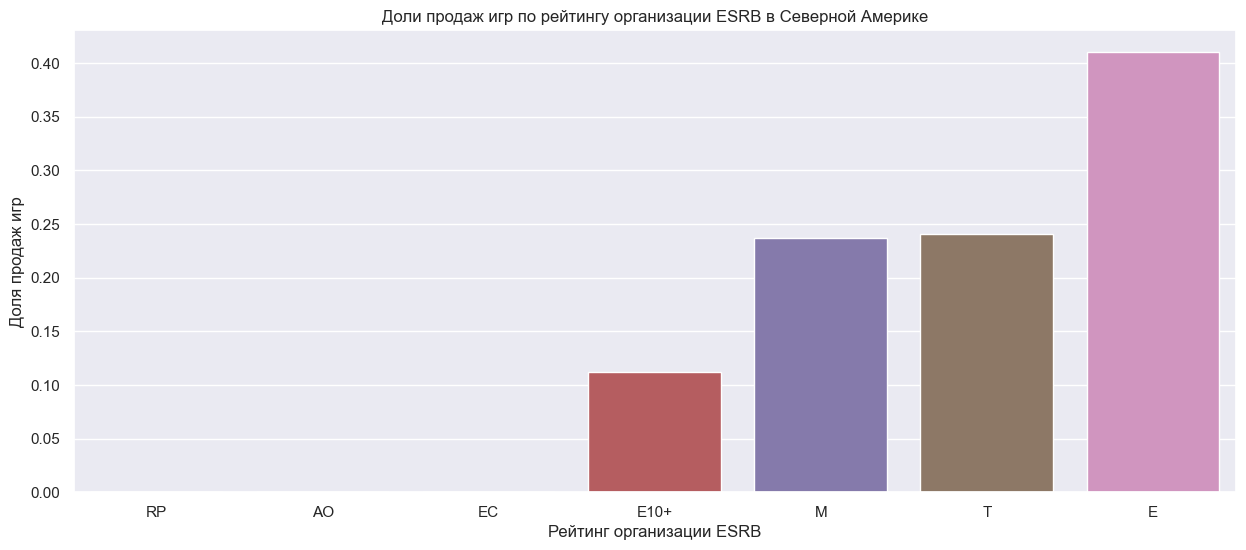

In [69]:
# визуализируем доли проданных игр с этими рейтингами в Северной Америке
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='na_sales'), x='rating', y='na_sales_share_by_rating')
ax.set(title='Доли продаж игр по рейтингу организации ESRB в Северной Америке', xlabel='Рейтинг организации ESRB',\
      ylabel='Доля продаж игр');

Итак: полученные доли продаж выглядят в Северной Америке следующим образом продано игр с рейтингом "Е" в общем объёме продаж немногим более 40%, на игры с рейтиногами "T" и "М" - немногим менее 25%, на игры с рейтингом "Е10+" - немногим более 10%. Остальные доли незначительны. 

Как это соотноситься с другими регионами - Европой и Японией? Сейчас узнаем.

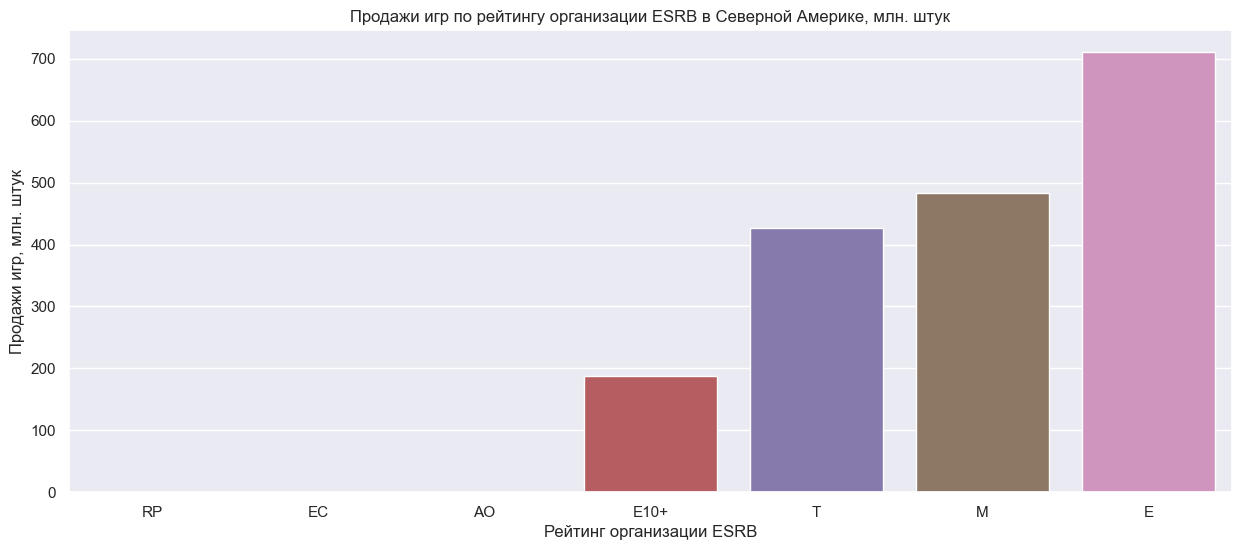

In [70]:
# визуализируем продажи игр по рейтингу организыции ESRB в Европе
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='eu_sales'), x='rating', y='eu_sales')
ax.set(title='Продажи игр по рейтингу организации ESRB в Северной Америке, млн. штук', xlabel='Рейтинг организации ESRB',\
      ylabel='Продажи игр, млн. штук');

Больше всего игр в Европе продаётся с рейтингом "E" (6+) - таких игр продано немногим больше 700 млн. штук. Далее идут игры с  рейтингами "М" (17+) и "Т" (13+) - их продано примерно 480 и 420 млн. штук. Далее идёт рейтинг "Е10+" (10+) - игр с таким рейтингом в Европе продано немногим менее 200 млн. штук. Игры с остальными рейтинги в общих продажах незначительны.

В общем картина похожа на продажи игр в Северной Америке, только игры с рейтингами "Т" и "М" здесь поменялись местами. Опять же для полноты картины проверим доли этих игр в общих продажах по региону.

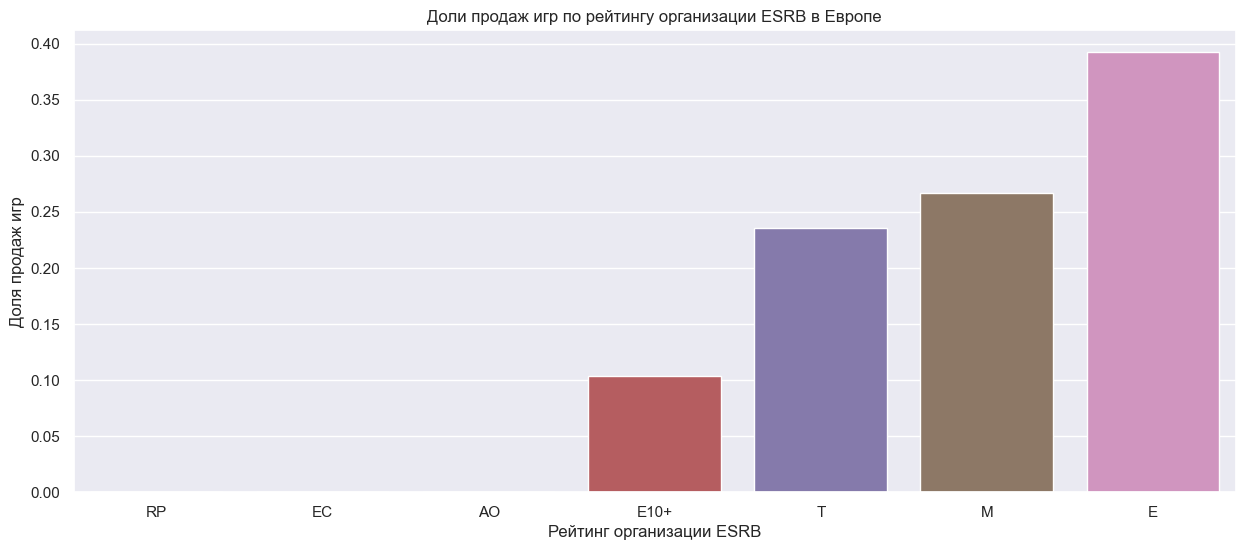

In [71]:
# визуализируем доли проданных игр с этими рейтингами в Европе
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='eu_sales'), x='rating', y='eu_sales_share_by_rating')
ax.set(title='Доли продаж игр по рейтингу организации ESRB в Европе', xlabel='Рейтинг организации ESRB',\
      ylabel='Доля продаж игр');

Доли в общем похожи на те, что были получены в Северной Америке. В Европе игры с рейтингом "Е" составляют немногим менее 40% от всех проданных игр, игры с рейтингом "М" - примерно 26%, с рейтингом "Т" - примерно 24%, а игры с рейтингом "Е10+" - чуть более 10%. Доля игр с остальными рейтингами незначительна.

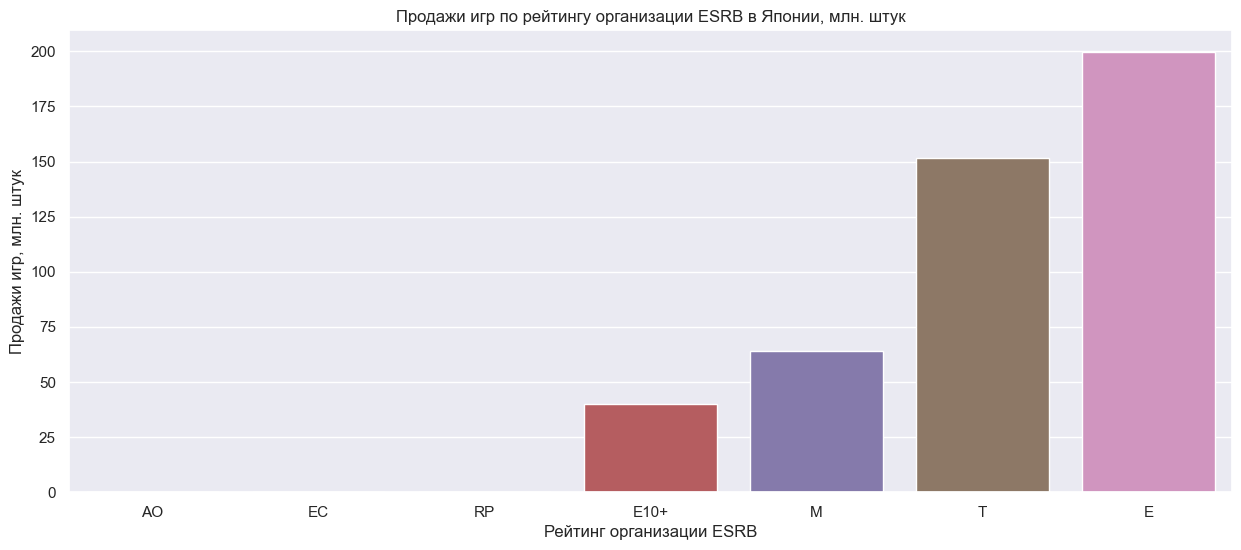

In [72]:
# визуализируем продажи игр по рейтингу организыции ESRB в Японии
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='jp_sales'), x='rating', y='jp_sales')
ax.set(title='Продажи игр по рейтингу организации ESRB в Японии, млн. штук', xlabel='Рейтинг организации ESRB',\
      ylabel='Продажи игр, млн. штук');

В Японии распределение будет следующим: игр с рейтингом "Е" (6+) продано было примерно 200 млн. штук, с рейтингом "Т" (13+) - примерно 150 млн. штук, с рейтингом "М" (17+) - примерно 63 млн. штук, а рейтингом "Е10+" (10+) примерно 38 млн. штук. Игр с остальными рейтингами было продано совсем немного в общем объёме игр.

Здесь мы наблюдаем большой разрыв между играми с рейтингами  "Т" и "М" - в Европе и Севверной Америке разрыв большим не был.

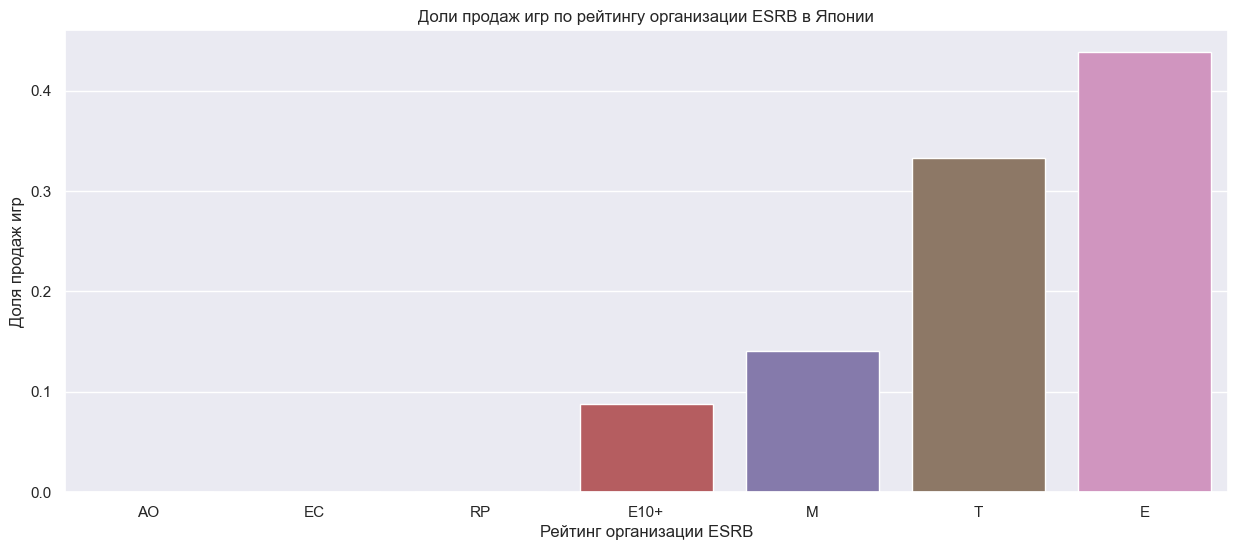

In [73]:
# визуализируем доли проданных игр с этими рейтингами в Японии
ax = sns.barplot(data=rating_esrb_impact.sort_values(by='jp_sales'), x='rating', y='jp_sales_share_by_rating')
ax.set(title='Доли продаж игр по рейтингу организации ESRB в Японии', xlabel='Рейтинг организации ESRB',\
      ylabel='Доля продаж игр');

В Японии игры с рейтингом "Е" составляют примерно 44% от всех проданных игр, игры с рейтингом "Т" - примерно 33%, с рейтингом "М" - примерно 14%, а игры с рейтингом "Е10+" - около 9%. Доля игр с остальными рейтингами незначительна.

Общий вывод: популярные рейтинги для игр повторяются, но есть небольшие отличия в их порядке. Наибольшие отличия наблюдаются между Японией и другими регионами, но они заключаются лишь в долях игр проданных, а вот порядок очень похож на другие регионы.

## Проверяем некоторые гипотезы

### Проверяем гипотезу о том, что средние пользовательские рейтнги платформ Xbox One и PC одинаковые

Гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC не равны.
Проверять гипотезу будем при уровне статистической значимости в 5%.

In [74]:
# отбираем данные для проверки гипотез
pc_games = games.query("platform == 'PC' & ~user_score.isna()")
xone_games = games.query("platform == 'XOne' & ~user_score.isna()")

alpha = 0.05 # уровень статистической значимости
# проверяем гипотезу и выводим результаты
results = st.ttest_ind(xone_games.user_score, pc_games.user_score, equal_var=False, alternative='two-sided')
print('p-значение:', results.pvalue)
print('Отвергаем гипотезу о равенстве средних пользовательских рейтингов на PC и Xbox One' if results.pvalue < alpha \
      else 'Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов на PC и Xbox One')
print('Средние пользовательские рейтинги на Xbox One равны', xone_games.user_score.mean().round(1))
print('Средние пользовательские рейтинги на PC равны', pc_games.user_score.mean().round(1))

p-значение: 2.2134347038518196e-06
Отвергаем гипотезу о равенстве средних пользовательских рейтингов на PC и Xbox One
Средние пользовательские рейтинги на Xbox One равны 6.5
Средние пользовательские рейтинги на PC равны 7.1


Мы предполагаем, что игры на PC и Xbox One никак друг от друга не зависят. И значит нет оснований, что пользовательские оценки на этих платформах будут друг на друга влиять. Выборочные средние должны быть нормально распределены по причине Центральной предельной теоремы. Разброс оценок предполагаем разный и прямо это указываем (выполняем t-критерий Уэлча (Стьюдента)). Поскольку нам требуется проверить равенство или не равенство , в альтернативной гипотезе мы проверяем с 2 сторон -  и на большее и на меньшее значение. Тест проводим 1 раз, а не много, поэтому нам не нужны дополнительные поправки (Pockocs или O'Brien-Fleming).

Итак: мы опровергли гипотезу о равенстве средних оценок на PC и Xbox One. По значению пользовательских оценок мы видим, что на PC пользовательские оценки выше. Тот же самый результат вышел бы и при уровне статистической значимости в 1%. 

### Проверяем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные

Гипотеза HO: средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports различаются.
Проверять гипотезу будем при уровне статистической значимости в 5%.

In [75]:
# отбираем данные для проверки гипотез
action_games = games.query("genre == 'Action' & ~user_score.isna()")
sports_games = games.query("genre == 'Sports' & ~user_score.isna()")

alpha = 0.05 # уровень статистической значимости
# проверяем гипотезу и выводим результаты
results = st.ttest_ind(action_games.user_score, sports_games.user_score, alternative='two-sided')
print('p-значение:', results.pvalue)
print('Отвергаем гипотезу о равенстве средних пользовательских рейтингов для игр с жанрами Action и Sports' if results.pvalue < alpha \
      else 'Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов для игр с жанрами Action и Sports')
print('Средние пользовательские рейтинги для игр с жанром Action равны', action_games.user_score.mean().round(1))
print('Средние пользовательские рейтинги для игр с жанром Sports равны', sports_games.user_score.mean().round(1))

p-значение: 0.1738817619988091
Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов для игр с жанрами Action и Sports
Средние пользовательские рейтинги для игр с жанром Action равны 6.9
Средние пользовательские рейтинги для игр с жанром Sports равны 6.8


При формировании гипотез в базовой гипотезе предполагается равенство наших средних, а в альтернативной нужный нам результат (в данном случае, не равенство наших переменных - а не больше или строго меньше другой выборки) - так работает этот метод.
Во время проверки гипотезы мы воспользовались методом проверки гипозы для независимых выборок. У нас нет оснований считать, что Спортивные игры зависят от Экшн-игр - если бы они были надо было бы использовать метод для зависимых переменных `scipy.stats.ttest_rel()`. Поскольку мы также не знаем как соотносятся дисперсии наших выборок мы взяли их равными друг другу. При понимании, что они разные надо указать `equal_var=False`. При таком случае выполнился бы t-критерий Уэлча. Из базовых условий осталось только нормальное распределение выборочных средних, но это не должно быть проблемой из-за Центральной предельной теоремы. Также поскольку мы применяем тест 1 раз, а не каждый день мы не ставили дополнительных поправок (Pockocs или O'Brien-Fleming).

Нам не удалось доказать, что средние пользовательские рейтинги для игр с жанрами Action и Sports сильно различаются. Отличие в средних пользовательских оценках в 0.1 не основание для опровержения гипотезы, что средние пользовательские оценки не равны друг другу.

## Общий вывод

**Проведя большое исследование для интернет магазина "Стримчик" мы получили следующие результаты:**
- **По поводу количества выпущенных игр в разные периоды:** до 1994 года игр особо много не выпускали (не более 50 штук за год) - это было время всевозможных приставок. С 1994 года по 2009 - уверенный рост количества игр (от 100 до 1400+ за год). С 2010 года наблюдается падение количества выпущенных игр. Сейчас выпускается 500 - 600 игр в год.
- **По поводу продаж игр по различным платформам:** самые популярные игровые платформы это PS2 (Play Station 2) - продажи более 1200 млн. игр, далее идут X360, PS3, Wii, DS и PS - у них от 720 млн. игр до 980 млн. игр. На всех остальных игровых платформах продано не более 300 млн. игр. Есть и совсем редкие платформы - ими стали PCFX, GG, 3DO, TG16, WS, NG и SCD - брать игры под них магазину точно не следует.
- **На вопрос о жизни различных игровых платформ:** мы узнали следующее - средний срок продажи игр на 1 платформе немногим более 7.5 лет, а медианная продолжительность жизни - 6 лет. Разница достагается за счёт "долгоиграющих" платформ - PC и DS. Их срок жизни более 25 лет. В процессе более глубокого анализа мы выяснили, что лучше брать срок продаж игр для платформы в 6 лет - так можно с большей вероятностью продать больше игр для этой платформы.
- **На вопрос о потенциально прибыльных платформах в 2017 году:** Текущие лидеры по продажам игр в 2016 году - это PS3 (3.6 млн. копий игр), Х360 (1.52 млн. копий игр). На остальных платформах продажи меньше и составляют не более 400 - 450 тыс. штук. Надо признать, что предположительно игры на PS3 и X360 могут ещё продаваться в 2017 году, но скорее всего, этот год продаж для них станет последним. Из новых платформ, кторые могут "выстрелить" нужно отметить - 3DS, WiiU и XOne, но у них у всех сейчас продажи не более 300 - 350 тыс. копий игр в год. Есть ещё PS4 c продажами около 400 тыс. руб за год, но её доля снижается каждый год и относительно постоянная платформа PC, но продажи игр для неё около 100 тыс. игр в год, остальные платформы не стоят внимального изучения.
- **По итогам построения графика "ящик с усами" по платформам по современному периоду мы узнали следующее:** С 2011 года максимальное число проданных копий 1ой игры было немногим больше 20 млн. штук и было это на платформе PS3. Вообще подавляющее большинство игр (более 75%) продаётся в количестве не более 1 млн. копий. Игр, которые набрали продаж значительно больше 5 млн. копий не так уж и много по всем платформам. Например, на PC такая игра была только одна, на WiiU - 2, а максимум на PS3 таких игр было 13. На некоторых не очень популярных в это время платформах таких игр не было вообще.
- **По поводу влияния оценок критиков и пользователей на продажи игры на некоторых крупных платформах:** мы имеем не очень сильную взаимосвязь между оценками критиков и суммарнными продажами игры на PS2. Но она есть и явно положительна, т.е. чем выше оценка критиков, тем больше продажи, но это не абсолютно. Коэффициент корреляции - 0.38. Влияние оценок пользователей на продажи менее существенно, чем критиков. Однако влияние всё равно положительно - коэффициент корреляции 0.2. Ещё можно заметить особенность: очень сильную взаимосвязь между продажами в общем и продажами в Северной Америке. Коэффициент корреляции - 0.92. Это означает, что подвляющее большинство продаж по этой платформе (PS2) было в Северной Америке. На продажи игр по платформе X360 оценки критиков влияют немного слабее, чем на PS2. Но влияние снова положительное (0.37), а вот оценки пользователей влияют на оценку слабо, но положительно (0.12). Аналогично платформе X360 обстоят дела и на платформе PS3.
- **По поводу влияния оценок критиков и пользователей на продажи игр в целом:** Если считать по данным по всем платформам, то влияние оценок критиков на общие продажи игр будет значительно слабее, чем на крупнейших платформах. Но всё равно, хотя и слабая взаимосвязь, но прослеживается - более высокие оценки критиков ассоциируются с более высокими продажами игр в целом. Среди всех платформ это влияние 0.23, а среднее между тремя крупнейшими платформами - 0.38. Оценки пользователей влияют на продажи игры крайне слабо, но положительно (0.11). Это примерно соотвествует 2 из 3 крупнейших игровых платформ. Также эти данные наглядно говорят, что пользователи гораздо более охотно купят игру, о которой хорошо отзываются критики, чем нежели другие пользователи.
- **По поводу самых прибыльных и самых неприбыльных жанрах:** больше всего игр за всё время продалось в жанре Action (Действие- экшн-игры). Игр с этим жанром продано примерно 1750 млн. штук. Спортивных игр было продано примерно 1300 млн. штук. Далее идут игры жанра Shooter (Стрелялки) - их было продано немногим более 1000 млн. штук. 3 самых непопулярных жанра по продажам игр - это стратегии, игры жанра Adventure (Приключения) и Говололомки - их продано не более 250 млн. штук. А вот по поводу продаж 1 игры конкретного жанра можно сказать следущее - игры с жанром Platform (Платформеры) уверенно лидируют с средними продажами более 900 тыс. копий на 1 игру, второе метро занимают игры с жанром Shooter (Стрелялки) - их продают в средней около 800 тыс. копий на 1 игру, третье место занимают Ролевые игры с продажами немногим более 600 тыс. копий на одну игру. А вот жанры Adventure (Приключения) и Strategy (Стратегии) особым спросом не пользуются - их продают около 190 и 230 тысяч копий на одну игру соответственно, но это всё время с 1980 года. С 2011 года (актуальный период) ситуация такова: самые продаваемые игры с 2011 года имеют жанры - Action, Shooter и Role-Playing. За всё время самые продаваемые игры имели жанры - Action, Sports, Shooter. В общем разница не такая уж и большая, если учесть, что жанр Sports в настоящее время идёт 4ым по популярности и лишь немного отстаёт от Ролевых игр. А вот тройка самых не продавамых жанров не изменилась. Ими стали Puzzle, Strategy и Adventure. изменился лишь ёе порядок, но это не суть важно. По продажам 1 игры с 2011 года ситуация следующая: больше всего теперь попупают игры с жанром Shooter (Стрелялки) - их продажи в среднем более 1.2 миллиона копий одной игры. Далее идут игры с жанром Platform (Платформеры) - их покупают немногим более 700 тыс. копий одной игры и замыкает тройку лидеров современных продаж Спортивные игры. А вот непопулярные жанры остались теми же - как игры жанров Adventure, Puzzle и Strategy особо не брали, так и не берут. Более того спрос на игры этих жанров даже сократился и составляет сейчас менее 200 тысяч копий на каждую из игр этих жанров.
- **Составляя портрет пользователя каждого региона мы узнали следующее: популярные платформы** Самые популярные игровые платформы в Северной Америке - это X360, PS2, Wii, PS3 и DS. Ещё достаточно крупная платформа это PS. Остальные менее распостранены или во всяком случае под них гораздо меньше продавали игр. Самые популярные игровые платформы в Европе - это PS2, PS3, X360, Wii и PS. Ещё достаточно крупная платформа это DS. Остальные менее распостранены или во всяком случае под них гораздо меньше продавали игр. Как видно они почти одинаковы, только порядок немножко другой. А вот Япония оригинальна. Но продаж меньше, чем в Северной Америке или Европе. Крупнейшие игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Ещё достаточно крупная платформа это NES. Платформы, которые не пользуются спросом в Японии это 2600, PCFX, GG, 3DO, TG16, PC, XOne и SCD. На долю 5 крупнейших платформ приходиться от 51 до 59% процентов всех продаж игр.
- **По поводу популярных жанров по каждому из регионов** В Северной Америке 5 жанров игры с наибольшими продажами это игры с жанрами Action, Sports, Shooter, Platform и Misc. На эти жанры приходится от 400 млн. штук до почти 900 млн. штук игр проданных. Непопулярные жанры - Strategy, Adventure и Puzzle. В Европе 5 жанров игры с наибольшими продажами это игры с жанрами Action, Sports, Shooter, Racing и Misc. На эти жанры приходится от 200 млн. штук до более чем 500 млн. штук игр проданных. Непопулярные жанры - Strategy, Puzzle и Adventure. В Японии 5 жанров игры с наибольшими продажами это игры с жанрами Role-Playing, Action, Sports, Platform и Misc. На эти жанры приходится от примерно 110 млн. штук до немного больше 350 млн. штук игр проданных. Непопулярные жанры - Shooter, Strategy и Adventure. Как и предполагалось - отличия от других регионов очень существенные: во-первых самый популярный жанр - Ролевые игры и они более чем в 2 раза популярнее любого любого другого жанра. Ни в Северной Америке, ни в Европе такой большой разницы не было. Во-вторых: самый непопулярный жанр - Shooter (Стрелялки) - в Северной Америке и Европе этот жанр 3ий по популярности. Очевидно, что если наш магазин находится в Японии надо корректировать предложение и раздачу попурных вариантов под местный колорит. Процент продаж 5 самых распостранённых жанров практически везде одинаковый - 68 с небольшим процентов.
- **По поводу влияния рейтинга ESRB можно сказать следующее:** Больше всего игр в Северной Америке продаётся с рейтингом "E" (6+) - таких игр продано свыше 1200 млн. штук. Далее сравнимые между собой рейтинги "Т" (13+) и "М" (17+) - их продано немногим меньше, чем по 800 млн. штук. Далее идёт рейтинг "Е10+" (10+) - игр с таким рейтингом в Северной Америке продано примерно 350 млн. штук. Игры с остальными рейтинги в общих продажах незначительны. Доли продаж выглядят в Северной Америке следующим образом: продано игр с рейтингом "Е" в общем объёме продаж немногим более 40%, на игры с рейтингами "T" и "М" - немногим меньше чем по 25%, на игры с рейтингом "Е10+" - немногим более 10%. Остальные доли незначительны. Больше всего игр в Европе продаётся с рейтингом "E" (6+) - таких игр продано немногим больше 700 млн. штук. Далее идут игры с рейтингами "М" (17+) и "Т" (13+) - их продано примерно 480 и 420 млн. штук. Далее идёт рейтинг "Е10+" (10+) - игр с таким рейтингом в Европе продано немногим менее 200 млн. штук. Игры с остальными рейтинги в общих продажах незначительны. В Европе игры с рейтингом "Е" составляют немногим менее 40% от всех проданных игр, игры с рейтингом "М" - примерно 26%, с рейтингом "Т" - примерно 24%, а игры с рейтингом "Е10+" - чуть более 10%. Доля игр с остальными рейтингами незначительна. В Японии распределение будет следующим: игр с рейтингом "Е" (6+) продано было примерно 200 млн. штук, с рейтингом "Т" (13+) - примерно 150 млн. штук, с рейтингом "М" (17+) - примерно 63 млн. штук, а рейтингом "Е10+" (10+) примерно 38 млн. штук. Игр с остальными рейтингами было продано совсем немного в общем объёме игр. В Японии игры с рейтингом "Е" составляют примерно 44% от всех проданных игр, игры с рейтингом "Т" - примерно 33%, с рейтингом "М" - примерно 14%, а игры с рейтингом "Е10+" - около 9%. Доля игр с остальными рейтингами незначительна. Общий вывод по этому вопросу: популярные рейтинги для игр повторяются, но есть небольшие отличия в их порядке. Наибольшие отличия наблюдаются между Японией и другими регионами, но они заключаются лишь в долях игр проданных, а вот порядок очень похож на другие регионы.
- **По поводу проверки гипотез** Мы опровергли гипотезу о равенстве средних оценок пользователей на PC и Xbox One. По значению пользовательских оценок мы видим, что на PC пользовательские оценки выше. Тот же самый результат вышел бы и при уровне статистической значимости в 1%. А также нам не удалось доказать, что средние пользовательские рейтинги для игр с жанрами Action и Sports сильно различаются. Отличие в средних пользовательских оценках в 0.1 не основание для опровержения гипотезы, что средние пользовательские оценки примерно не равны друг другу.